# Introduction

## Problem Statement
- Service centers face significant challenges in maintaining optimal spare parts inventory to meet market demand effectively. Despite high expenditures on inventory, spare parts availability remains a persistent issue, leading to inefficiencies, service delays, and customer dissatisfaction. They often spend too much on inventory, yet still face issues with spare parts not being available when needed. This leads to delays, higher costs, and unhappy customers.

## Objective
- To develop a predictive inventory forecasting model that enables service centers to achieve Just-In-Time (JIT) inventory standards. The model aims to balance inventory levels, reduce holding costs, minimize stockouts, and enhance spare parts availability in alignment with market demand.

## Input Features 
- There are 6 input features in our dataset which are

1) Invoice Date
2) Job Card Date
3) Business Partner Name
4) Vehicle No
5) Vehicle Model
6) Current KM Reading
7) Invoice Line Text (Spare Parts)

## Output Feature (Target Variable)
- This feature has been named as 'monthly demand' which is derived from 'spare_parts' and 'invoice_date'.

### Installing mysql-connector 

In [1]:
!pip install --user mysql-connector

In [2]:
!pip install mysql-connector-python

# Basic Information

### Importing necessary libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Importing warnings for warnings to be ignored

In [4]:
import warnings
warnings.filterwarnings('ignore')

### Connecting to the database

In [5]:
import mysql.connector
from mysql.connector import Error
try:
    # Establishing the database connection
    connection = mysql.connector.connect(
        host="18.136.157.135", 
        database="project_service_data", 
        user="dm_usdata_sql",  
        password="37z<49REb&mKnl4AV!vJ"
    )
    if connection.is_connected():
        print("Connected to the database!")
        mycursor = connection.cursor()
        mycursor.execute("SELECT * FROM service_data LIMIT 5")
        output = mycursor.fetchall()
        print("Output from the service_data table:")
        for x in output:
            print(x)
except Error as e:
    print("Error while connecting to MySQL:", e)

Connected to the database!
Output from the service_data table:
('30-05-17', '30-05-17', 'shivXXXXXXXXXX', 'KA03MFXXXX', 'BAJAJ AVENGER STREET 220', '50000', 'ENGINE OIL')
('02-06-17', '31-05-17', 'KIRAXXXXXXXXXX', 'KA53ESXXXX', 'BAJAJ PULSAR NS 200', '758', 'ENGINE OIL')
('02-06-17', '31-05-17', 'KIRAXXXXXXXXXX', 'KA53ESXXXX', 'BAJAJ PULSAR NS 200', '758', 'POLISH')
('02-06-17', '31-05-17', 'KIRAXXXXXXXXXX', 'KA53ESXXXX', 'BAJAJ PULSAR NS 200', '758', 'CONSUMABLES')
('02-06-17', '31-05-17', 'KIRAXXXXXXXXXX', 'KA53ESXXXX', 'BAJAJ PULSAR NS 200', '758', 'COOLANT OIL')


### Installing sqlalchemy pymysql

In [6]:
pip install sqlalchemy pymysql

Note: you may need to restart the kernel to use updated packages.


### Loading the SQL file

In [7]:
from sqlalchemy import create_engine

# Create SQLAlchemy engine
engine = create_engine("mysql+pymysql://dm_usdata_sql:37z<49REb&mKnl4AV!vJ@18.136.157.135/project_service_data")

# Define your query
query = "SELECT * FROM service_data"

# Read data into a DataFrame using pandas
service_data = pd.read_sql(query, con=engine)

# Display the data
print(service_data.head())

  invoice_date job_card_date business_partner_name  vehicle_no  \
0     30-05-17      30-05-17        shivXXXXXXXXXX  KA03MFXXXX   
1     02-06-17      31-05-17        KIRAXXXXXXXXXX  KA53ESXXXX   
2     02-06-17      31-05-17        KIRAXXXXXXXXXX  KA53ESXXXX   
3     02-06-17      31-05-17        KIRAXXXXXXXXXX  KA53ESXXXX   
4     02-06-17      31-05-17        KIRAXXXXXXXXXX  KA53ESXXXX   

              vehicle_model current_km_reading invoice_line_text  
0  BAJAJ AVENGER STREET 220              50000        ENGINE OIL  
1       BAJAJ PULSAR NS 200                758        ENGINE OIL  
2       BAJAJ PULSAR NS 200                758            POLISH  
3       BAJAJ PULSAR NS 200                758       CONSUMABLES  
4       BAJAJ PULSAR NS 200                758       COOLANT OIL  


In [8]:
service_data.head()

,invoice_date,job_card_date,business_partner_name,vehicle_no,vehicle_model,current_km_reading,invoice_line_text
0,30-05-17,30-05-17,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000,ENGINE OIL
1,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,ENGINE OIL
2,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,POLISH
3,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,CONSUMABLES
4,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,COOLANT OIL


In [9]:
service_data.tail()

,invoice_date,job_card_date,business_partner_name,vehicle_no,vehicle_model,current_km_reading,invoice_line_text
28477,06-01-19,06-01-19,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805,SPROCKET RUBBER
28478,06-01-19,06-01-19,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805,CLUTCH CABLE
28479,06-01-19,06-01-19,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805,OIL FILTER
28480,06-01-19,06-01-19,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805,DISC OIL
28481,06-01-19,06-01-19,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805,AIR FILTER


### Renaming the column 'invoice_line_text' as 'spare_parts'

In [10]:
# We are renaming the invoice_line_text column as spare_parts
service_data.rename(columns={'invoice_line_text':'spare_parts'},inplace=True)

In [11]:
service_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28482 entries, 0 to 28481
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   invoice_date           28482 non-null  object
 1   job_card_date          28482 non-null  object
 2   business_partner_name  28482 non-null  object
 3   vehicle_no             28482 non-null  object
 4   vehicle_model          28482 non-null  object
 5   current_km_reading     28482 non-null  object
 6   spare_parts            28476 non-null  object
dtypes: object(7)
memory usage: 1.5+ MB


### Checking the unique values of features

In [12]:
# Checking the unique spare parts names
service_data.spare_parts.unique()

array(['ENGINE OIL', 'POLISH', 'CONSUMABLES', 'COOLANT OIL',
       'CHAIN LUBRICATION', '4 WAY SWITCH', '3M OIL', 'GENERAL SERVICE',
       'OIL FILTER', 'INDICATOR', 'HEAD REST', 'VALVE GUIDE',
       'TIMMING CHAIN', 'FOOT REST', 'LOW BEAM BULB', 'VALVE GRAINDING',
       'DISC PAD', 'LOADING GEAR', 'PACKING KIT', 'TIMMING CHAIN PAD',
       'TENSIONER', 'CLUTCH BELL REST', 'CLUTCH ASSEMBLY', 'VALVE KIT',
       'SPARK PLUG', 'ONE WAY CLUTCH', 'BORE KIT', 'AIR FILTER',
       'HEAD RUBBER', 'CLUTCH CABLE', 'CRANK SHAFT', 'BRAKE ADJUSTMENT',
       'BRAKE SHOE', 'AIR FILTER CHECKUP', 'DRUM BOLT WASHER',
       'TANK CLEANING', 'FORK BEND', 'GEAR SHAFT', 'CLUTCH COVER GASKET',
       'INDICATOR BULB', 'GEAR LEVER', 'HANDLEBAR', 'CRASH GUARD',
       'FORK OIL SEAL', 'FORK OIL', 'SIDE SHIELD', 'VISIOR',
       'FORK CONE SET', 'HEAD LIGHT DOOM', 'TANK ASSEMBLY',
       'Clutch cable', 'DISC LEVER', 'CARBURETOR CLEANING', 'SEAT COVER',
       'BUZZER', 'TAIL LAMP BULB', 'DISC OIL', 'DIS

In [13]:
# Checking the unique business partner names
service_data.business_partner_name.unique()

array(['shivXXXXXXXXXX', 'KIRAXXXXXXXXXX', 'pattXXXXXXXXXX', ...,
       'THOPXXXXXXXXXX', 'yeshXXXXXXXXXX', 'jithXXXXXXXXXX'], dtype=object)

In [14]:
# Checking the number of unique business partner names
service_data.business_partner_name.nunique()

1010

In [15]:
# Checking the unique names of the vehicle models
service_data.vehicle_model.unique()

array(['BAJAJ AVENGER STREET 220', 'BAJAJ PULSAR NS 200', 'BAJAJ PLATINA',
       'BAJAJ V', 'BAJAJ PULSAR 150', 'BAJAJ PULSAR 220',
       'BAJAJ PULSAR 180', 'BAJAJ AVENGER STREET', 'BAJAJ CT 100',
       'BAJAJ DISCOVER', 'BAJAJ PULSAR LS135', 'BAJAJ DISCOVER 125',
       'BAJAJ V150', 'BAJAJ BOXER CT', 'BAJAJ PULSAR RS 200',
       'BAJAJ DISCOVER 150', 'BAJAJ PULSAR AS 200', 'BAJAJ XCD 125',
       'BAJAJ V125', 'BAJAJ WIND 125', 'BAJAJ DISCOVER 135',
       'BAJAJ PULSAR NS 160', 'BAJAJ CALIBER', 'BAJAJ XCD 135', 'WAVE',
       'BAJAJ AVENGER STREET 180', 'BAJAJ V15', 'BAJAJ DOMINAR 400 ABS'],
      dtype=object)

In [16]:
# Checking the unique values in current km reading
service_data.current_km_reading.unique()

array(['50000', '758', '3717', ..., '2914', '3425', '12805'], dtype=object)

### Converting the dtype of current_km_reading from object to integer

In [17]:
service_data['current_km_reading'] = service_data['current_km_reading'].astype(int)

In [18]:
service_data.current_km_reading.unique()

array([50000,   758,  3717, ...,  2914,  3425, 12805])

In [19]:
service_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28482 entries, 0 to 28481
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   invoice_date           28482 non-null  object
 1   job_card_date          28482 non-null  object
 2   business_partner_name  28482 non-null  object
 3   vehicle_no             28482 non-null  object
 4   vehicle_model          28482 non-null  object
 5   current_km_reading     28482 non-null  int32 
 6   spare_parts            28476 non-null  object
dtypes: int32(1), object(6)
memory usage: 1.4+ MB


### Checking for Null values

In [20]:
service_data.isnull().sum()

invoice_date             0
job_card_date            0
business_partner_name    0
vehicle_no               0
vehicle_model            0
current_km_reading       0
spare_parts              6
dtype: int64

### Imputing 'spare_parts' missing values with mode
- Seeing the dataset, 6 rows have missing values in the spare_parts column.
- We are replacing the values with the mode of the spare_parts in our dataset.

In [21]:
service_data['spare_parts'] = service_data['spare_parts'].fillna(service_data['spare_parts'].mode()[0])

### Checking for Null values after imputing missing values for 'spare_parts'

In [22]:
service_data.isnull().sum()

invoice_date             0
job_card_date            0
business_partner_name    0
vehicle_no               0
vehicle_model            0
current_km_reading       0
spare_parts              0
dtype: int64

### Checking the shape of the dataset

In [23]:
service_data.shape

(28482, 7)

### Describing the continuous variable

In [24]:
service_data.describe() 

,current_km_reading
count,28482.000000
mean,19348.003827
std,25246.722306
min,0.000000
25%,3988.000000
50%,12420.500000
75%,27905.000000
max,610112.000000


- Seeing the description the mean value suggests that the typical km reading in our dataset is around 19348 kms.
- Also if we see the standard deviation the value is 25246.72 which indicates that the majority of the data lie within this deviation from the mean.
- If we see the minimum value, it is at 0, which could indicate that the vehicle is either new, or just serviced and the odometer has been reset.
- If we see the 25th percentile, it is at 3988 kms or below which indicates that 25th percentile of the vehicles have run 3988 kms.
- Similarly the 50th percentile shows that half of the vehicles have run 12420.5 kms or below and the other half are above this limit.
- Also if we see the 75th percentile, the value is at 27905 kms which indicates that the 75th percentile of vehicles have run 27905 kms or below.
- If we see the maximum value which is 610112, this indicates that there are a few vehicles which have run more than 6 lakh kms. Which indicates that this is an outlier.
- This outlier is unusual and does not represent the typical data and could influence the mean value.
- Seeing the outlier the data seems to have skewness where most of the data have relatively low km readings which can be seen from the mean and different percentile values.

## Checking for vehicles with current km reading as 0
- We consider the vehicles that have current km reading as 0 to be either new vehicles, or the odometer has been recently reset.

In [25]:
# Count the number of zeros in 'current_km_reading'
num_zeros = (service_data['current_km_reading'] == 0).sum()

# Print the result
print(f"Number of zeros in 'current_km_reading': {num_zeros}")

Number of zeros in 'current_km_reading': 842


### Describing the catagorical variable

In [26]:
service_data.describe(include='O')

,invoice_date,job_card_date,business_partner_name,vehicle_no,vehicle_model,spare_parts
count,28482,28482,28482,28482,28482,28482
unique,555,553,1010,846,28,503
top,01-12-18,01-12-18,venkXXXXXXXXXX,KA53EVXXXX,BAJAJ PULSAR 150,ENGINE OIL
freq,179,179,424,1313,8633,3808


- Seeing the categorical variable, invoice_date and job_card_date are in date format.
- If we see the unique values, invoice date has 555 values and job card date has 553.
- If we see the top date, it is for December 1st, which indicates that most of the vehicles have been given on this date for servicing.
- If we see the business_partner_name, this basically refers to the customer name who has given the vehicle for servicing and the top person is venkXXXXXXXXXX and this person has given his vehicle 424 times for servicing.
- If we see the vehicle_no, there are 826 unique numbers present in our dataset. And the top vehicle_no is KA53EVXXXX which has come in 1313.
- Also if we see the vehicle model there are 28 unique models and the top model is BAJAJ PULSAR 150 which has come in 8633 times. This could indicate that this model often requires servicing.
- If we see the column of spare_parts, there are 503 unique values. The top value being ENGINE OIL has been used 3808 times.

# Exploratory Data Analysis & Feature engineering

## Extracting Date, Month and Year from invoice_date

In [27]:
service_data.invoice_date.unique()

array(['30-05-17', '02-06-17', '31-05-17', '03-06-17', '05-06-17',
       '01-06-17', '04-06-17', '08-06-17', '10-06-17', '06-06-17',
       '07-06-17', '09-06-17', '14-06-17', '13-06-17', '11-06-17',
       '12-06-17', '16-06-17', '15-06-17', '17-06-17', '18-06-17',
       '19-06-17', '20-06-17', '21-06-17', '22-06-17', '23-06-17',
       '24-06-17', '25-06-17', '26-06-17', '27-06-17', '28-06-17',
       '29-06-17', '30-06-17', '01-07-17', '03-07-17', '04-07-17',
       '05-07-17', '06-07-17', '07-07-17', '08-07-17', '09-07-17',
       '10-07-17', '11-07-17', '12-07-17', '13-07-17', '14-07-17',
       '15-07-17', '17-07-17', '18-07-17', '19-07-17', '20-07-17',
       '21-07-17', '22-07-17', '24-07-17', '25-07-17', '26-07-17',
       '27-07-17', '28-07-17', '29-07-17', '31-07-17', '01-08-17',
       '02-08-17', '03-08-17', '04-08-17', '05-08-17', '07-08-17',
       '08-08-17', '09-08-17', '10-08-17', '11-08-17', '12-08-17',
       '14-08-17', '15-08-17', '16-08-17', '17-08-17', '18-08-

## Extracting Date, Month and Year from invoice_date
- For further analysis we are extracting the date, month and the year from invoice_date.

In [28]:
# Changing the format of invoice_date to datetime
service_data['invoice_date'] = pd.to_datetime(service_data['invoice_date'], dayfirst=True, errors='coerce')

In [29]:
# Extracting the day, month, year and weekday from the dataset and changing it to datetime format
service_data['invoice_day']= pd.to_datetime(service_data.invoice_date, format = '%d/%m/%y').dt.day
service_data['invoice_month']= pd.to_datetime(service_data.invoice_date, format = '%d/%m/%y').dt.month
service_data['invoice_year']= pd.to_datetime(service_data.invoice_date, format = '%d/%m/%y').dt.year
service_data['invoice_weekday'] = pd.to_datetime(service_data.invoice_date, format = '%d/%m/%y').dt.day_name()
service_data.head()

,invoice_date,job_card_date,business_partner_name,vehicle_no,vehicle_model,current_km_reading,spare_parts,invoice_day,invoice_month,invoice_year,invoice_weekday
0,2017-05-30,30-05-17,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000,ENGINE OIL,30,5,2017,Tuesday
1,2017-06-02,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,ENGINE OIL,2,6,2017,Friday
2,2017-06-02,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,POLISH,2,6,2017,Friday
3,2017-06-02,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,CONSUMABLES,2,6,2017,Friday
4,2017-06-02,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,COOLANT OIL,2,6,2017,Friday


## Extracting Date,month, Year from job_card_date

In [30]:
# Changing the format of job_card_date to datetime
service_data['job_card_date'] = pd.to_datetime(service_data['job_card_date'], dayfirst=True, errors='coerce')

In [31]:
# Extracting the day, month, year and weekday from the dataset and changing it to datetime format
service_data['job_card_day']= pd.to_datetime(service_data.job_card_date, format = '%d/%m/%y').dt.day
service_data['job_card_month']= pd.to_datetime(service_data.job_card_date, format = '%d/%m/%y').dt.month
service_data['job_card_year']= pd.to_datetime(service_data.job_card_date, format = '%d/%m/%y').dt.year
service_data['job_card_week'] = pd.to_datetime(service_data.job_card_date, format = '%d/%m/%y').dt.isocalendar().week
service_data.head()

,invoice_date,job_card_date,business_partner_name,vehicle_no,vehicle_model,current_km_reading,spare_parts,invoice_day,invoice_month,invoice_year,invoice_weekday,job_card_day,job_card_month,job_card_year,job_card_week
0,2017-05-30,2017-05-30,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000,ENGINE OIL,30,5,2017,Tuesday,30,5,2017,22
1,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,ENGINE OIL,2,6,2017,Friday,31,5,2017,22
2,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,POLISH,2,6,2017,Friday,31,5,2017,22
3,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,CONSUMABLES,2,6,2017,Friday,31,5,2017,22
4,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,COOLANT OIL,2,6,2017,Friday,31,5,2017,22


### Removing 'X' from business_partner_name
- The names contain only first 4 letters and then X as the name.
- We are extracting the first 4 letters and removing X from the name.

In [32]:
# We are creating another column called cleaned_name where the X has been removed.
service_data['cleaned_name'] = service_data['business_partner_name'].str.split('X').str[0]

In [33]:
service_data.head()

,invoice_date,job_card_date,business_partner_name,vehicle_no,vehicle_model,current_km_reading,spare_parts,invoice_day,invoice_month,invoice_year,invoice_weekday,job_card_day,job_card_month,job_card_year,job_card_week,cleaned_name
0,2017-05-30,2017-05-30,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000,ENGINE OIL,30,5,2017,Tuesday,30,5,2017,22,shiv
1,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,ENGINE OIL,2,6,2017,Friday,31,5,2017,22,KIRA
2,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,POLISH,2,6,2017,Friday,31,5,2017,22,KIRA
3,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,CONSUMABLES,2,6,2017,Friday,31,5,2017,22,KIRA
4,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,COOLANT OIL,2,6,2017,Friday,31,5,2017,22,KIRA


In [34]:
# Checking the unique values in the cleaned_name column
service_data.cleaned_name.unique()

array(['shiv', 'KIRA', 'patt', ..., 'THOP', 'yesh', 'jith'], dtype=object)

### Removing 'X' from vehicle_no
- In our dataset, the vehicle number also has X after few letters.
- We are removing X from the vehicle numbers and putting the values in a new column

In [35]:
# Checking the unique values before removing 'X'
service_data.vehicle_no.unique()

array(['KA03MFXXXX', 'KA53ESXXXX', 'KA53EMXXXX', 'KA53S3XXXX',
       'KA53ERXXXX', 'KA05JGXXXX', 'KA02EWXXXX', 'KA53EQXXXX',
       'KA51EVXXXX', 'ka 53 XXXX', 'KA03JJXXXX', 'KA53V3XXXX',
       'KA53S9XXXX', 'KA44K6XXXX', 'KA03HSXXXX', 'KA53EPXXXX',
       'KA02EJXXXX', 'KA53X6XXXX', 'KA03JGXXXX', 'KA53ENXXXX',
       'AYUSHXXXX', 'KA53EDXXXX', 'KA03JLXXXX', 'KA01HRXXXX',
       'KA023JXXXX', 'KA03HVXXXX', 'KA51ECXXXX', 'KA09HFXXXX',
       'KA27V8XXXX', 'KA07S4XXXX', 'TS08FAXXXX', 'KA53X2XXXX',
       'KA53ELXXXX', 'KA51X3XXXX', 'KA05HCXXXX', 'KA04JDXXXX',
       'KA53W3XXXX', 'KA03JCXXXX', 'KA51L8XXXX', 'KA40X6XXXX',
       'KA02HGXXXX', 'KHXXXX', 'MH12JDXXXX', 'MUNRAJXXXX', 'KA53S5XXXX',
       'KA53J9XXXX', 'KA01HNXXXX', 'KA04EVXXXX', 'KA03JAXXXX',
       'KA04HZXXXX', 'KA11ECXXXX', 'KA01HMXXXX', 'TN29BBXXXX',
       'KA04HWXXXX', 'KA05JDXXXX', 'KA53ETXXXX', 'KA01HFXXXX',
       'KA53EJXXXX', 'KA04JFXXXX', 'KA51ENXXXX', 'KA03JEXXXX',
       'KA02HJXXXX', 'KA01EYXXXX', 'KA54EMXXXX

In [36]:
# Remove the last 4 characters
service_data['extracted_vehicle_no'] = service_data['vehicle_no'].str[:-4]  

In [37]:
service_data.head()

,invoice_date,job_card_date,business_partner_name,vehicle_no,vehicle_model,current_km_reading,spare_parts,invoice_day,invoice_month,invoice_year,invoice_weekday,job_card_day,job_card_month,job_card_year,job_card_week,cleaned_name,extracted_vehicle_no
0,2017-05-30,2017-05-30,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000,ENGINE OIL,30,5,2017,Tuesday,30,5,2017,22,shiv,KA03MF
1,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,ENGINE OIL,2,6,2017,Friday,31,5,2017,22,KIRA,KA53ES
2,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,POLISH,2,6,2017,Friday,31,5,2017,22,KIRA,KA53ES
3,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,CONSUMABLES,2,6,2017,Friday,31,5,2017,22,KIRA,KA53ES
4,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,COOLANT OIL,2,6,2017,Friday,31,5,2017,22,KIRA,KA53ES


In [38]:
# Checking the unique values after removing 'X'
service_data.extracted_vehicle_no.unique()

array(['KA03MF', 'KA53ES', 'KA53EM', 'KA53S3', 'KA53ER', 'KA05JG',
       'KA02EW', 'KA53EQ', 'KA51EV', 'ka 53 ', 'KA03JJ', 'KA53V3',
       'KA53S9', 'KA44K6', 'KA03HS', 'KA53EP', 'KA02EJ', 'KA53X6',
       'KA03JG', 'KA53EN', 'AYUSH', 'KA53ED', 'KA03JL', 'KA01HR',
       'KA023J', 'KA03HV', 'KA51EC', 'KA09HF', 'KA27V8', 'KA07S4',
       'TS08FA', 'KA53X2', 'KA53EL', 'KA51X3', 'KA05HC', 'KA04JD',
       'KA53W3', 'KA03JC', 'KA51L8', 'KA40X6', 'KA02HG', 'KH', 'MH12JD',
       'MUNRAJ', 'KA53S5', 'KA53J9', 'KA01HN', 'KA04EV', 'KA03JA',
       'KA04HZ', 'KA11EC', 'KA01HM', 'TN29BB', 'KA04HW', 'KA05JD',
       'KA53ET', 'KA01HF', 'KA53EJ', 'KA04JF', 'KA51EN', 'KA03JE',
       'KA02HJ', 'KA01EY', 'KA54EM', 'KA53EE', 'KA50W1', 'KA53EC',
       'TN70D3', 'KA02JC', 'KA02HA', '1STFRE', 'KA09EZ', 'KA01EH',
       'KA03JF', 'KA53V2', 'KA03HJ', 'MANJUN', 'PY01BB', 'VINOD',
       'KA01EL', 'KA51EK', 'KA03JB', 'MH14GG', 'KA10S5', 'ARUNKU',
       'KA04JG', 'TN54E9', 'AP16CL', 'KA16X4', 'KA53Y1', '

In [39]:
# Checking unique values in spare_parts
service_data.spare_parts.unique()

array(['ENGINE OIL', 'POLISH', 'CONSUMABLES', 'COOLANT OIL',
       'CHAIN LUBRICATION', '4 WAY SWITCH', '3M OIL', 'GENERAL SERVICE',
       'OIL FILTER', 'INDICATOR', 'HEAD REST', 'VALVE GUIDE',
       'TIMMING CHAIN', 'FOOT REST', 'LOW BEAM BULB', 'VALVE GRAINDING',
       'DISC PAD', 'LOADING GEAR', 'PACKING KIT', 'TIMMING CHAIN PAD',
       'TENSIONER', 'CLUTCH BELL REST', 'CLUTCH ASSEMBLY', 'VALVE KIT',
       'SPARK PLUG', 'ONE WAY CLUTCH', 'BORE KIT', 'AIR FILTER',
       'HEAD RUBBER', 'CLUTCH CABLE', 'CRANK SHAFT', 'BRAKE ADJUSTMENT',
       'BRAKE SHOE', 'AIR FILTER CHECKUP', 'DRUM BOLT WASHER',
       'TANK CLEANING', 'FORK BEND', 'GEAR SHAFT', 'CLUTCH COVER GASKET',
       'INDICATOR BULB', 'GEAR LEVER', 'HANDLEBAR', 'CRASH GUARD',
       'FORK OIL SEAL', 'FORK OIL', 'SIDE SHIELD', 'VISIOR',
       'FORK CONE SET', 'HEAD LIGHT DOOM', 'TANK ASSEMBLY',
       'Clutch cable', 'DISC LEVER', 'CARBURETOR CLEANING', 'SEAT COVER',
       'BUZZER', 'TAIL LAMP BULB', 'DISC OIL', 'DIS

In [40]:
# Checking unique values in current_km_reading
service_data.current_km_reading.unique()

array([50000,   758,  3717, ...,  2914,  3425, 12805])

### Moving spare_parts column to the end

In [41]:
service_data_col = service_data.columns.to_list()

# Remove the 7th column (index 6) and move 'spare_parts' to the end
service_data_col.pop(6)  # Remove the 7th column 
service_data_col.append('spare_parts')  # Add 'spare_parts' to the end

# Reindex the DataFrame
service_data = service_data[service_data_col]
service_data.head()

,invoice_date,job_card_date,business_partner_name,vehicle_no,vehicle_model,current_km_reading,invoice_day,invoice_month,invoice_year,invoice_weekday,job_card_day,job_card_month,job_card_year,job_card_week,cleaned_name,extracted_vehicle_no,spare_parts
0,2017-05-30,2017-05-30,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000,30,5,2017,Tuesday,30,5,2017,22,shiv,KA03MF,ENGINE OIL
1,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,2,6,2017,Friday,31,5,2017,22,KIRA,KA53ES,ENGINE OIL
2,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,2,6,2017,Friday,31,5,2017,22,KIRA,KA53ES,POLISH
3,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,2,6,2017,Friday,31,5,2017,22,KIRA,KA53ES,CONSUMABLES
4,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,2,6,2017,Friday,31,5,2017,22,KIRA,KA53ES,COOLANT OIL


### Dropping the columns ('invoice_date', 'job_card_date', 'business_partner_name', 'vehicle_no')

In [42]:
service_data.drop(columns = ['invoice_date'], inplace = True )
service_data.drop(columns = ['job_card_date'], inplace = True )
service_data.drop(columns = ['business_partner_name'], inplace = True )
service_data.drop(columns = ['vehicle_no'], inplace = True )

In [43]:
service_data.head()

,vehicle_model,current_km_reading,invoice_day,invoice_month,invoice_year,invoice_weekday,job_card_day,job_card_month,job_card_year,job_card_week,cleaned_name,extracted_vehicle_no,spare_parts
0,BAJAJ AVENGER STREET 220,50000,30,5,2017,Tuesday,30,5,2017,22,shiv,KA03MF,ENGINE OIL
1,BAJAJ PULSAR NS 200,758,2,6,2017,Friday,31,5,2017,22,KIRA,KA53ES,ENGINE OIL
2,BAJAJ PULSAR NS 200,758,2,6,2017,Friday,31,5,2017,22,KIRA,KA53ES,POLISH
3,BAJAJ PULSAR NS 200,758,2,6,2017,Friday,31,5,2017,22,KIRA,KA53ES,CONSUMABLES
4,BAJAJ PULSAR NS 200,758,2,6,2017,Friday,31,5,2017,22,KIRA,KA53ES,COOLANT OIL


# Insights from univariate analysis

#### 1) Distribution of vehicle model

In [44]:
# Checking the Vehicle Model counts
vehicle_model_counts = service_data['vehicle_model'].value_counts()
print(vehicle_model_counts)

vehicle_model
BAJAJ PULSAR 150            8633
BAJAJ AVENGER STREET 220    4212
BAJAJ PULSAR 220            2655
BAJAJ PULSAR 180            2252
BAJAJ PULSAR NS 200         2204
BAJAJ CT 100                1432
BAJAJ DISCOVER 125          1346
BAJAJ AVENGER STREET        1112
BAJAJ PLATINA                844
BAJAJ V150                   686
BAJAJ DISCOVER               679
BAJAJ PULSAR LS135           520
BAJAJ PULSAR AS 200          421
BAJAJ PULSAR NS 160          364
BAJAJ PULSAR RS 200          322
BAJAJ DISCOVER 150           284
BAJAJ AVENGER STREET 180     122
BAJAJ DISCOVER 135           115
BAJAJ V125                    95
BAJAJ V                       54
BAJAJ CALIBER                 40
BAJAJ XCD 125                 27
BAJAJ V15                     23
BAJAJ XCD 135                 13
WAVE                          10
BAJAJ DOMINAR 400 ABS          7
BAJAJ WIND 125                 6
BAJAJ BOXER CT                 4
Name: count, dtype: int64


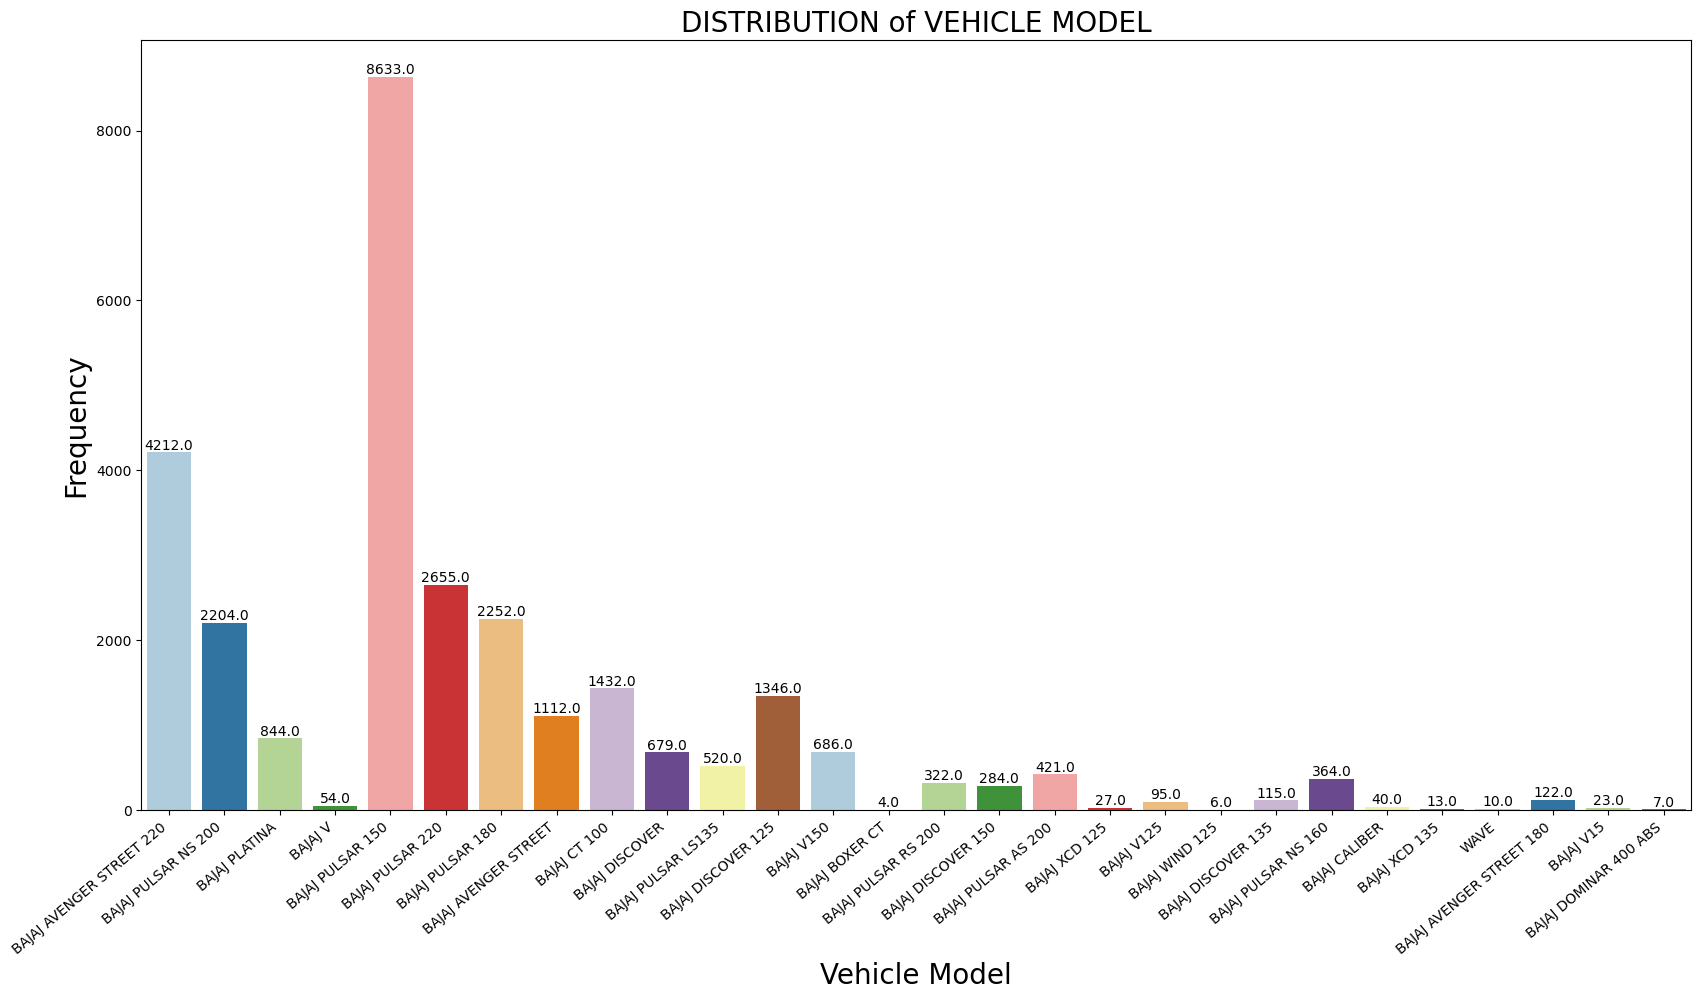

In [45]:
plt.figure(figsize=(20,10))
ax=sns.countplot(x='vehicle_model',hue='vehicle_model', data=service_data, palette='Paired',legend= False)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')
plt.title('DISTRIBUTION of VEHICLE MODEL',fontsize=20)
ax.set_xlabel('Vehicle Model',fontsize=20)
ax.set_ylabel('Frequency',fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = 'right') 

plt.show()

- This graph shows the number of times each vehicle has been serviced in a particular service center.
- If we see the graph, the highest serviced vehicle is Bajaj Pulsar 150 (8633) and lowest serviced vehicle is Bajaj Boxer CT (4).
- Also the next vehicles in frequency are Bajaj Avenger Street 220, Bajaj Pulsar 220 and Bajaj Pulsar 180.
- The lowest serviced vehicles are at a frequency which is below 20.

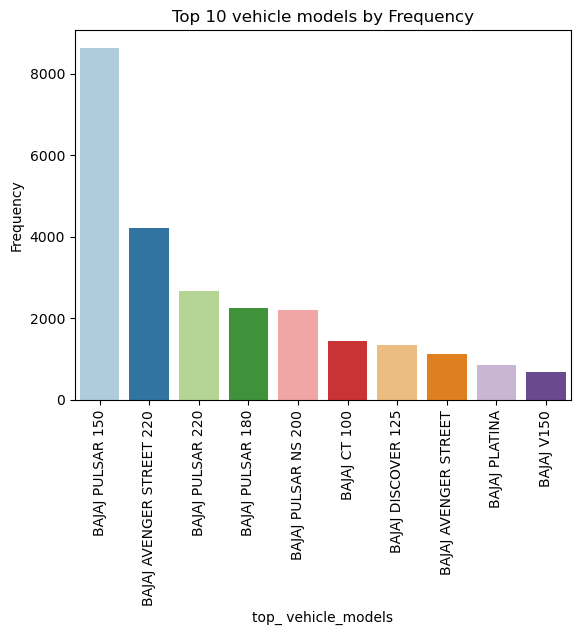

In [46]:
top_vehicle_models = vehicle_model_counts.head(10)
sns.barplot(x = top_vehicle_models.index, y = top_vehicle_models.values,palette='Paired',legend= False)
plt.xticks(rotation=90)
plt.xlabel('top_ vehicle_models')
plt.ylabel('Frequency')
plt.title('Top 10 vehicle models by Frequency')
plt.show()

- If we see the top ten vehicle models with frequency, the top vehicle is the Bajaj Pulsar 150 with a frequency beinf 8000+ .
- Also, the lowest vehicle in the above graph is the Bajaj V150 with a frequency below 1000.

#### Top 50 Vehicle Models

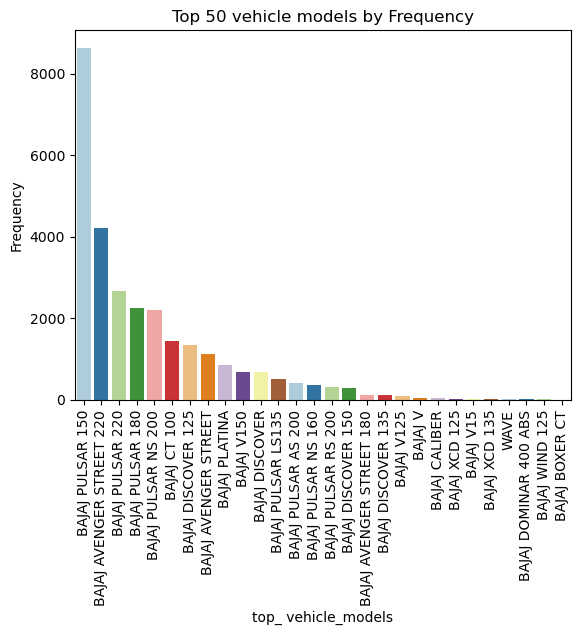

In [47]:
top_vehicle_models = vehicle_model_counts.head(50)
sns.barplot(x = top_vehicle_models.index, y = top_vehicle_models.values,palette='Paired',legend= False)
plt.xticks(rotation=90)
plt.xlabel('top_ vehicle_models')
plt.ylabel('Frequency')
plt.title('Top 50 vehicle models by Frequency')
plt.show()

- If we see the graph of top 50 vehicle models, the graph is gradually decreasing.
- The highest number of times the vehicle has been serviced is only for the first 5 vehicle models.

#### 2) Distribution of the Owner

In [48]:
partner_counts = service_data['cleaned_name'].value_counts()   # Checking the value counts of business partners
print(partner_counts)

cleaned_name
venk    424
manj    362
pras    328
shiv    314
chan    312
       ... 
SUMA      1
VIRU      1
ARGH      1
reva      1
a ve      1
Name: count, Length: 1010, dtype: int64


#### Top 10 Partners by Frequency

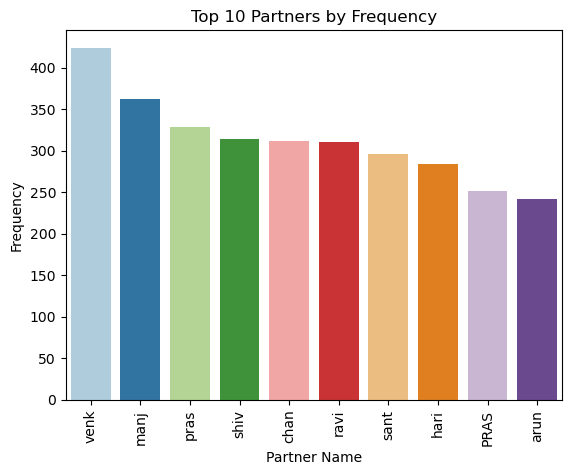

In [49]:
top_partners = partner_counts.head(10)
sns.barplot(x=top_partners.index, y=top_partners.values,palette='Paired',legend= False)
plt.xticks(rotation=90)
plt.xlabel('Partner Name')
plt.ylabel('Frequency')
plt.title('Top 10 Partners by Frequency')
plt.show()

- If we see the above graph it shows the top 10 customers (Business Partner) who have got their vehicles serviced.
- The top customer is a person named Venk at 424 followed by Manj at 362 and Pras at 328.
- Also if we see the pattern in the graph there is no drastic change in the number of times the vehicles has come for servicing. 

#### Top 40 Partners by Frequency

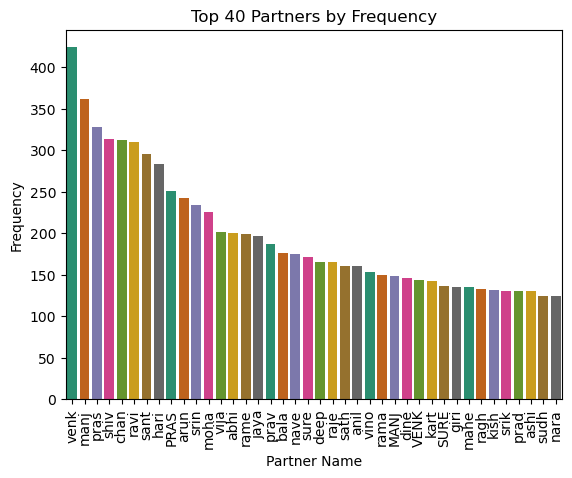

In [50]:
top_partners = partner_counts.head(40)
sns.barplot(x=top_partners.index, y=top_partners.values,palette='Dark2',legend=False)
plt.xticks(rotation=90)
plt.xlabel('Partner Name')
plt.ylabel('Frequency')
plt.title('Top 40 Partners by Frequency')
plt.show()

- If wee the graph for the top 40 Parteners, we can see a gradual decrease in the frequency.
- As the number of partners are more than 400, all partners cannot be shown in a single graph, however 

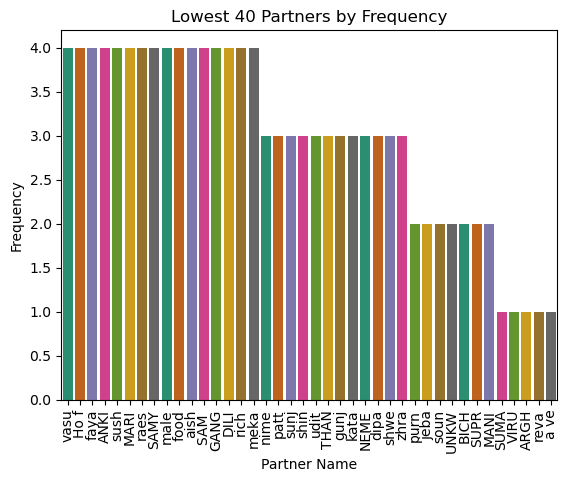

In [51]:
top_partners = partner_counts.tail(40)
sns.barplot(x=top_partners.index, y=top_partners.values,palette='Dark2',legend=False)
plt.xticks(rotation=90)
plt.xlabel('Partner Name')
plt.ylabel('Frequency')
plt.title('Lowest 40 Partners by Frequency')
plt.show()

- Each bar represents a partner, and its height indicates the frequency of that partner’s involvement.
- The bars show that several partners have the same frequency, with most partners having a frequency of 2 or 3, and only a few with a frequency of 1 which could indicate a new vehicle or a first time servicing.

#### 3) Top 10 Vehicle Numbers

In [52]:
# Checking the vehicle_no_counts
vehicle_no_counts = service_data['extracted_vehicle_no'].value_counts()
print(vehicle_no_counts)

extracted_vehicle_no
KA53EV    1313
KA53EQ    1296
KA53ET    1238
KA53ER    1187
KA53ES    1129
          ... 
AP16BX       1
KA11EL       1
KA53S9       1
KA53V3       1
KA03MF       1
Name: count, Length: 846, dtype: int64


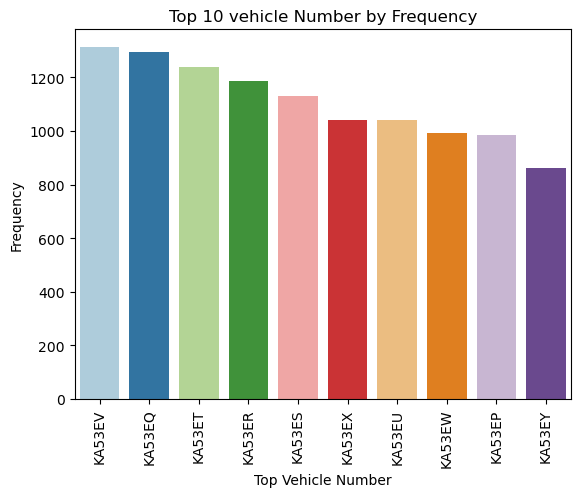

In [53]:
top_vehicle_no = vehicle_no_counts.head(10)
sns.barplot(x = top_vehicle_no.index, y = top_vehicle_no.values,palette='Paired',legend= False)
plt.xticks(rotation=90)
plt.xlabel('Top Vehicle Number')
plt.ylabel('Frequency')
plt.title('Top 10 vehicle Number by Frequency')
plt.show()

- If we see the graph of the top vehicle numbers, there is a gradual decrease in the frequency.
- However all the values in the top ten are between 800 to 1400.

#### Top 30 Vehicles Numbers by frequency

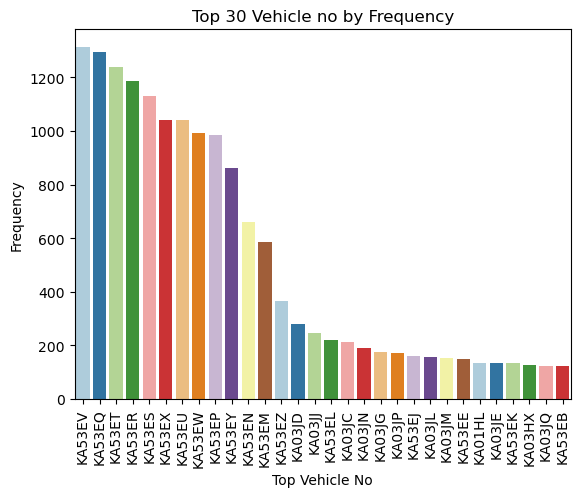

In [54]:
top_vehicle_no = vehicle_no_counts.head(30)
sns.barplot(x = top_vehicle_no.index, y = top_vehicle_no.values,palette='Paired',legend= False)
plt.xticks(rotation=90)
plt.xlabel('Top Vehicle No')
plt.ylabel('Frequency')
plt.title('Top 30 Vehicle no by Frequency')
plt.show()

- If we see the graph of the top 30 vehicle numbers, after the first 11 models, there is a common consistency in the frequency.

### 4) Distribution of Spare Parts

In [55]:
# Checking the count of spare parts
spare_parts_counts = service_data['spare_parts'].value_counts()
print(spare_parts_counts.head(50))

spare_parts
ENGINE OIL             3808
CHAIN LUBRICATION      3441
GENERAL SERVICE        2142
AIR FILTER             1715
3M OIL                 1628
CONSUMABLES            1595
POLISH                 1245
DISC OIL                991
BRAKE SHOE              965
OIL FILTER              821
DISC PAD                575
WHEEL RUBBER            521
AIR FILTER CHECKUP      467
SPARK PLUG              421
CHAIN SPROCKET          396
SPROCKET RUBBER         347
SPROCKET BEARING        314
CHAIN OVERHAUL          284
CLUTCH CABLE            263
CLUTCH ASSEMBLY         212
CLUTCH COVER GASKET     190
CLUTCH OVERHUAL         163
TANK COVER              134
LABOUR                  131
SEAT COVER              119
INDICATOR               110
DISC PUMP KIT           104
DRUM BOLT               103
TAIL LAMP BULB          101
FOOT REST                99
CLUTCH LEVER             98
FORK OIL                 95
MIRROR                   91
BATTERY                  83
TENSIONER                79
DISC OVE

#### Top 10 spare parts by frequency

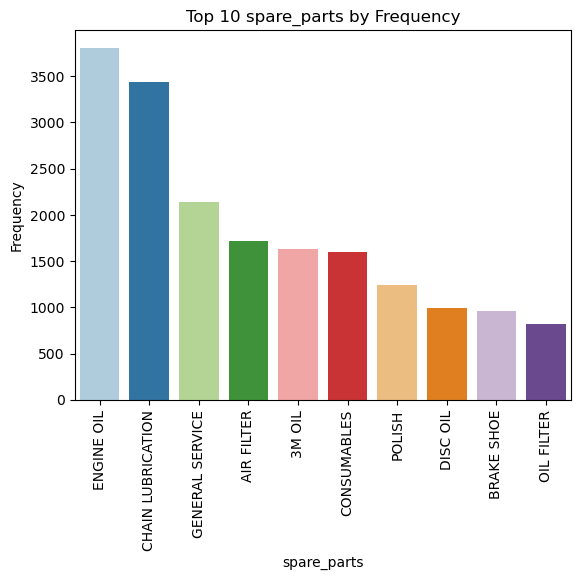

In [56]:
spare_parts = spare_parts_counts.head(10)
sns.barplot(x = spare_parts.index, y = spare_parts.values,palette='Paired',legend= False)
plt.xticks(rotation=90)
plt.xlabel('spare_parts')
plt.ylabel('Frequency')
plt.title('Top 10 spare_parts by Frequency')
plt.show()

- If we see the graph of spare parts, the highest frequency is for Engine Oil which is above 3500.
- And if we see the lowest frequency in the top 10 spare parts, it is the Oil Filter which is below 1000.
- If we see the trend in the above graph, after the first 2 (Engine Oil and Chain Lubrication), there is a gradual decrease in the frequency of the rest of the spare parts.

#### Top 40 spare parts by frequency

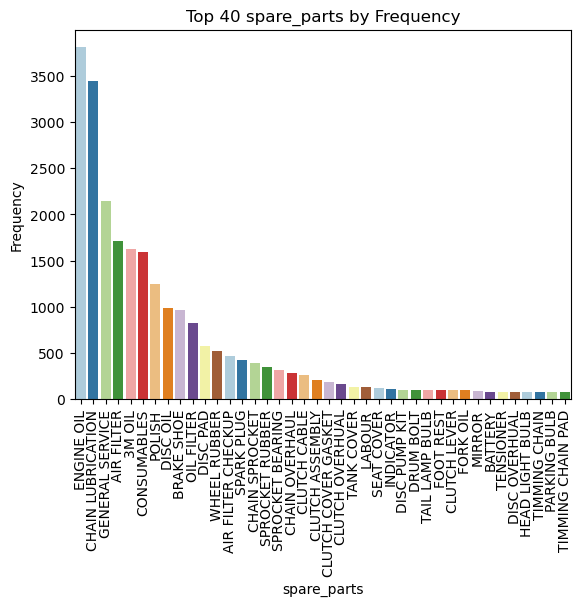

In [57]:
spare_parts = spare_parts_counts.head(40)
sns.barplot(x = spare_parts.index, y = spare_parts.values,palette='Paired',legend= False)
plt.xticks(rotation=90)
plt.xlabel('spare_parts')
plt.ylabel('Frequency')
plt.title('Top 40 spare_parts by Frequency')
plt.show()

- If we see the above graph, the demand for the first 10 parts is high, compared to the rest of the spare parts.
- Also if we see the last 10 parts, the frequency is not changing much.

### 4) Distribution of Current Km Reading

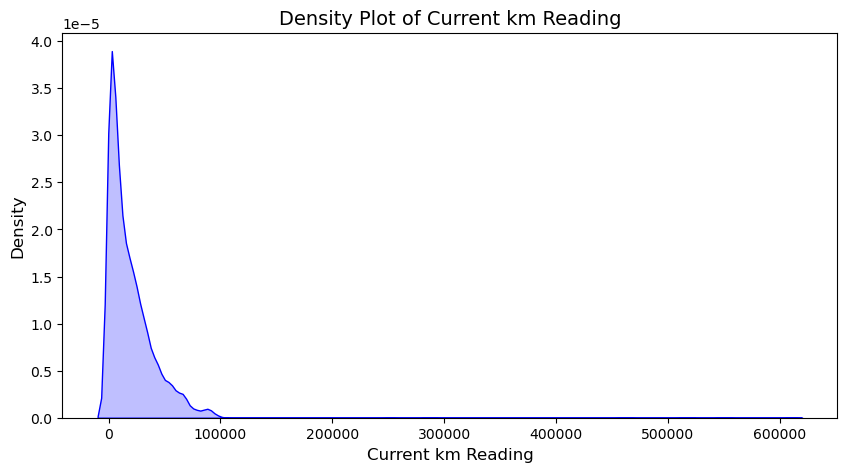

In [58]:
plt.figure(figsize=(10, 5))
sns.kdeplot(service_data['current_km_reading'], shade=True, color="blue")

# Add title and labels
plt.title("Density Plot of Current km Reading", fontsize=14)
plt.xlabel("Current km Reading", fontsize=12)
plt.ylabel("Density", fontsize=12)

# Show the plot
plt.show()

- The above graph is a depiction of the mileage of the vehicles.
- The distribution is right-skewed (positively skewed).
- Seeing the graph the majority of vehicles have low mileage.
- The highest density is near low km values, suggesting most vehicles in the dataset are relatively new or lightly used.
- Some vehicles have very high mileage.
- The long tail suggests that a small number of vehicles have exceptionally high usage, possibly commercial or heavily used vehicles.
- Vehicles above 400,000 km might be outliers, requiring further investigation.

# BIVARIATE ANALYSIS
- Before we do bivariate analysis we are creating a new column "categories".
- We are categorising the spare parts based on the relation between the parts.
- The categories are
1) Engine and Transmission
2) Electrical and Lighting Components
3) Braking, Suspension and Wheels
4) Body, Frame and Fuel System
5) Accessories, Exhaust and Services
6) Other

In [59]:
service_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28482 entries, 0 to 28481
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   vehicle_model         28482 non-null  object
 1   current_km_reading    28482 non-null  int32 
 2   invoice_day           28482 non-null  int32 
 3   invoice_month         28482 non-null  int32 
 4   invoice_year          28482 non-null  int32 
 5   invoice_weekday       28482 non-null  object
 6   job_card_day          28482 non-null  int32 
 7   job_card_month        28482 non-null  int32 
 8   job_card_year         28482 non-null  int32 
 9   job_card_week         28482 non-null  UInt32
 10  cleaned_name          28482 non-null  object
 11  extracted_vehicle_no  28482 non-null  object
 12  spare_parts           28482 non-null  object
dtypes: UInt32(1), int32(7), object(5)
memory usage: 2.0+ MB


In [60]:
# Checking the count of each individual spare part
spare_parts_counts = service_data['spare_parts'].value_counts()
print(spare_parts_counts.head(50))

spare_parts
ENGINE OIL             3808
CHAIN LUBRICATION      3441
GENERAL SERVICE        2142
AIR FILTER             1715
3M OIL                 1628
CONSUMABLES            1595
POLISH                 1245
DISC OIL                991
BRAKE SHOE              965
OIL FILTER              821
DISC PAD                575
WHEEL RUBBER            521
AIR FILTER CHECKUP      467
SPARK PLUG              421
CHAIN SPROCKET          396
SPROCKET RUBBER         347
SPROCKET BEARING        314
CHAIN OVERHAUL          284
CLUTCH CABLE            263
CLUTCH ASSEMBLY         212
CLUTCH COVER GASKET     190
CLUTCH OVERHUAL         163
TANK COVER              134
LABOUR                  131
SEAT COVER              119
INDICATOR               110
DISC PUMP KIT           104
DRUM BOLT               103
TAIL LAMP BULB          101
FOOT REST                99
CLUTCH LEVER             98
FORK OIL                 95
MIRROR                   91
BATTERY                  83
TENSIONER                79
DISC OVE

### Creating New Column 'Categories'
- We have 503 unique spare parts which is quite a huge collection.
- Hence we are categorising the spare parts into 5 seperate categories.

In [61]:
categories = {
    "Engine & Transmission": ['CAM SHAFT', 'INTAKE', 'GEAR', 'CLUTCH', 'OIL SEAL KIT', 'PISTON', 'CRANK SHAFT', 'ONE WAY CLUTCH', 'ENGINE', 'GB', 'MAGNET', 'PICKUP COIL', 'VALVE', 'TENSIONER', 'SPARK PLUG', 'CRANK RESET', 'AIR INTAKE', 'O-RING','HEAD'],
    "Electrical & Lighting Components": ['BATTERY','BUZZER','RACTIFIER','FUSE','ADAPTER' ,'SWITCH','HEAD LIGHT','SELF','WIRING','RECTIFIER','DC KIT','CDI UNIT','ENGINE TEM SENSOR', 'TAIL LAMP', 'INDICATOR','COIL','BRAKE LIGHT','FLASHER', 'PILOT LIGHT','LAMP','HIGH BEAM BULD', 'LIGHT','SPEEDOMETER','BULB','HEAD LIGHT','HORN''POWER ADAPTER'],
    "Braking, Suspension & Wheels": ['BRAKE','REAR TUBE','FORK','SPRING','DISK PAD',' ASSEMBLY','MASTER CYLINDER', 'DISC','CALIPER RUBBER KIT','MASTER CYLINDER','PUMP KIT','DRUM','TYRE','TUBELESS NECK','RIM','MAGWHEEL', 'PEDAL','WHEEL','CHAIN','KIT','FRONT NO','SHOCK', 'ABSORBER','CONE SET','U BUSH','BEARING','CHAIN','SPROCKET'],
    "Body, Frame & Fuel System": ['MUDGUARD','HEAD REST','VISOR','DOOM','SIDE SHIELD RUBBER','BODY COVER','SIDE MASK','MIRROR','GRILL','STEP HOLDER','STAND RUBBER','COOLANT','OIL COOLER CAP','OIL PUMP','OIL LENS','TANK', 'SIDE STAND', 'HANDLE', 'SEAT','PETROL','CARBURETOR','FLOAT','SIDE STAND','HANDLE','FUEL','OIL SEAL','RADIATOR','AXLE','CENTER STAND','YOKE','STAY','ENGINE GUARD','SHIELD','SEAT','REAR FOOT','LADIES','FOOT','CRASH GUARD','SIDE SHIELD','SIDE STAND','NUMBER PLATE'],
    "Accessories, Exhaust, & Services" : ['SILENCER','POLISH','WIND SHIELD RUBBER KIT','VISIOR','FOG LAMP','TANK CAP','TANK BAG','TANK DENT','TANK FLOP','ENGINE OIL TOP-UP','ENGINE OIL COOLER PIPE','ENGINE OIL TANK COVER','RC CARD','REGISTR','LIFE TIME TAX','ADD ON FEES','PAYMENT','INSURANCE','PUNCHER','WELDING','HELMET','WASHING','FITTING LABOUR','STICKER','HORN FITTING CHARGE','HAND GLOVES']
}

### Creating a Sub-Category (Other)
- This category contains the spare parts which are not included in the categories defined above.

In [62]:
def categorize(part):
    for category, keywords in categories.items():
        if any(keyword.lower() in part.lower() for keyword in keywords):
            return category
    return 'Other'  # Default category for unclassified parts

service_data['category'] = service_data['spare_parts'].apply(categorize)
print(service_data)

                  vehicle_model  current_km_reading  invoice_day  \
0      BAJAJ AVENGER STREET 220               50000           30   
1           BAJAJ PULSAR NS 200                 758            2   
2           BAJAJ PULSAR NS 200                 758            2   
3           BAJAJ PULSAR NS 200                 758            2   
4           BAJAJ PULSAR NS 200                 758            2   
...                         ...                 ...          ...   
28477        BAJAJ DISCOVER 125               12805            6   
28478        BAJAJ DISCOVER 125               12805            6   
28479        BAJAJ DISCOVER 125               12805            6   
28480        BAJAJ DISCOVER 125               12805            6   
28481        BAJAJ DISCOVER 125               12805            6   

       invoice_month  invoice_year invoice_weekday  job_card_day  \
0                  5          2017         Tuesday            30   
1                  6          2017          Fri

### Checking all the Sub-Categories

In [63]:
unique_spare_parts = service_data.groupby('category')['spare_parts'].unique()
print(unique_spare_parts)

category
Accessories, Exhaust, & Services    [POLISH, VISIOR, SILENCER, SILENCER JALL, WASH...
Body, Frame & Fuel System           [COOLANT OIL, FOOT REST, TANK CLEANING, HANDLE...
Braking, Suspension & Wheels        [CHAIN LUBRICATION, TIMMING CHAIN, DISC PAD, P...
Electrical & Lighting Components    [4 WAY SWITCH, INDICATOR, LOW BEAM BULB, INDIC...
Engine & Transmission               [ENGINE OIL, HEAD REST, VALVE GUIDE, VALVE GRA...
Other                               [CONSUMABLES, 3M OIL, GENERAL SERVICE, OIL FIL...
Name: spare_parts, dtype: object


In [64]:
# Checking the unique values in the category Engine and Transmission
unique_parts = service_data[service_data['category'] == 'Engine & Transmission']['spare_parts'].unique()
print(unique_parts)

['ENGINE OIL' 'HEAD REST' 'VALVE GUIDE' 'VALVE GRAINDING' 'LOADING GEAR'
 'TENSIONER' 'CLUTCH BELL REST' 'CLUTCH ASSEMBLY' 'VALVE KIT' 'SPARK PLUG'
 'ONE WAY CLUTCH' 'HEAD RUBBER' 'CLUTCH CABLE' 'CRANK SHAFT' 'GEAR SHAFT'
 'CLUTCH COVER GASKET' 'GEAR LEVER' 'HEAD LIGHT DOOM' 'Clutch cable'
 'ENGINE GUARD' 'CLUTCH CAM ' 'ENGINE BEARING' 'CRANK RESET'
 'ENGINE LABOUR' 'CLUTCH LEVER' 'CLUTCH OVERHUAL' 'HEAD LIGHT STAY'
 'HEAD LIGHT BULB' 'clutch cable' 'CLUTCH SWITCH'
 'ONE WAY CLUTCH BUSH KIT' 'Clutch CABLE' 'CAM SHAFT' 'HEAD O RING'
 'GEAR LEVER RUBBER' 'CAM SHAFT SPRING' 'ENGINE OIL TOPUP' 'ENGINE WORK'
 'HEAD LIGHT HOLDER' 'CLUTCH ADJUSTMENT' 'AIR INTAKE' 'CLUTCH OUTLET PIPE'
 'ENGINE SCREW KIT' 'OIL SEAL KIT' 'HEAD BORE GASKET' 'HEAD LIGHT SWITCH'
 'HEAD CAP O RING' 'GB COVER SCREW' 'GEAR LEVER BOLT'
 'ENGINE OIL TANK COVER SEAT LADIES ENGINE GUARD' 'CLUTCH CAM SPRING'
 'MAGNET COVER BOLT' 'BALANCING GEAR' 'ENGINE RUBBER' 'PICKUP COIL'
 'ENGINE CASE WELDING' 'GEAR AND GB SHAFT OIL SE

In [65]:
# Checking the unique values in the category Electrical and Lighting Components
unique_parts_electrical = service_data[service_data['category'] == 'Electrical & Lighting Components']['spare_parts'].unique()
print(unique_parts_electrical)

['4 WAY SWITCH' 'INDICATOR' 'LOW BEAM BULB' 'INDICATOR BULB' 'BUZZER'
 'TAIL LAMP BULB' 'SWITCH' 'PARKING BULB' 'SPEEDOMETER CAP'
 'BATTERY CHARGE' 'SPEEDOMETER CABLE' 'WIRING CHECKUP' 'SWITCH '
 'RACTIFIER' 'SELF MOTOR' 'TAIL LAMP COVER' 'BATTERY' 'TAIL LAMP ASSEMBLY'
 'BRAKE LIGHT SWITCH' 'INDICATOR SWITCH' 'BATTERY BELT' 'BOTTLE COIL'
 'BRAKE SWITCH' 'SPEEDOMETER COVER' 'STARTER COIL' 'SELF REALY'
 'WIRING KIT' 'SELF KIT' 'BULB ' 'BULB' 'SPEEDOMETER' 'CDI UNIT'
 'WIRING LABOUR' 'WIRING' 'PLUG ADAPTER' 'FUSE BOX' 'PLUG ADAPTER RUBBER'
 'COIL CHECK' 'DC KIT' 'SPEEDOMETER BULB' 'PILOT LIGHT' 'FLASHER' 'FUSE'
 'BATTERY CLIP' 'TAIL LAMP GLASS' 'COIL' 'COIL START' 'INDICATOR BUZZER'
 'REAR BREAK LIGHT SWITCH' 'BRAKE LIGHT SPRING' 'SPEEDOMETER STAY'
 'BULB HOLDER' 'BRAKE LIGHT SWITCH ' 'SPEEDOMETER WORM' 'FUEL WIRING KIT'
 'MUDGAURD CLAMP' 'FOG LAMP' 'NUMBER PLATE CLAMP' 'SPEEDOMETER CLAMP'
 'REAR TAIL LAMP GRILL' 'FOG LAMP FITTING' 'WIRING CHECK WITH LABOR'
 'MUDGUARD CLAMP' 'LIGHTING COI

### Checking the number of Unique values

In [66]:
# Checking the number of unique values in Engine and Transmission
unique_parts = service_data[service_data['category'] == 'Engine & Transmission']['spare_parts'].nunique()
print(unique_parts)

107


In [67]:
# Checking the number of unique values in Electrical & Lighting Components
unique_parts_electrical = service_data[service_data['category'] == 'Electrical & Lighting Components']['spare_parts'].nunique()
print(unique_parts_electrical)

81


In [68]:
# Checking the number of unique values in Braking,Suspension & Wheels
unique_parts_braking = service_data[service_data['category'] == 'Braking, Suspension & Wheels']['spare_parts'].nunique()
print(unique_parts_braking)

107


In [69]:
# Checking the number of unique values in Body, Frame & Fuel System
unique_parts_frame = service_data[service_data['category'] == 'Body, Frame & Fuel System']['spare_parts'].nunique()
print(unique_parts_frame)

103


In [70]:
# Checking the number of unique values in Accessories, Exhaust, & Services
unique_parts_accessories = service_data[service_data['category'] == 'Accessories, Exhaust, & Services']['spare_parts'].unique()
print(unique_parts_accessories)

['POLISH' 'VISIOR' 'SILENCER' 'SILENCER JALL' 'WASHING' 'STOPPER WELDING'
 'SILENCER JALI' 'SILENCER GASKET' 'STICKER' 'PUNCHER' 'VISIOR STICKER'
 'VISIOR WITH LABOUR' 'WELDING' 'SILENCER JALL SCREW' 'HELMET LOCK'
 'PAYMENT' 'RC CARD' 'LIFE TIME TAX' 'ADD ON FEES' 'TAPPED WELDING'
 'CASE WELDING' 'HELMET CABLE' 'STAND WELDING' 'INSURANCE'
 'FITTING LABOUR' 'VISIOR BOTTOM COVER' 'WASHING AND LABOUR'
 'WASHING AND POLISH' 'SILENCER WELDING' 'HORN FITTING CHARGE' 'HELMET']


In [71]:
unique_parts_accessories = service_data[service_data['category'] == 'Accessories, Exhaust, & Services']['spare_parts'].nunique()
print(unique_parts_accessories)

31


In [72]:
# Checking the number of unique values in Other
unique_parts_Other = service_data[service_data['category'] == 'Other']['spare_parts'].unique()
print(unique_parts_Other)

['CONSUMABLES' '3M OIL' 'GENERAL SERVICE' 'OIL FILTER' 'AIR FILTER'
 'AIR FILTER CHECKUP' 'SERVICE' 'LOCK SET' 'ACCELATOR CABLE' 'JALL SCREW'
 'GRIPPER' 'LABOUR' 'LOCK ARM' 'HORN' '' 'CHOKE CABLE' 'KICKER STOPPER'
 'OIL CAMP O RING' 'LOCK SET BOLT' 'PAD' 'TEFLON COATING'
 'SIDE SHELD RUBBER' 'HALF ACCELERATOR' 'TOP PLATE' 'TUBE' 'BOLT WIELDING'
 'MASTER CYLENDER' 'LEVER BOLT' 'SIDE LOCK' 'PACKING' 'KICKER' 'LEVER'
 'PLUG' 'THREADING' 'BODY ' 'HOLDER STEP' 'BOLT REMOVAL' 'RELAY' 'REBORE'
 'EX SHOW ROOM' 'REGISTER FEES' 'BC UNIT' 'SAREE GUARD' 'BORE' 'SIDE BOX'
 'SPPEDOMETER CABLE' 'MOBILE HOLDER' 'OIL COOLER PIPE' 'BEDDING BOLT'
 'BORE GASKET' 'MUDGAURD' 'REGISTER EXPENSES' 'DISK PLATE' 'LEVER RUBBER'
 'ONE WAY BODY' 'PULSAR RS 200 ABS' '8 SIZE BOLT' 'STOPPER HOLDER'
 'STAND LOCK PIN ' 'CABLE LOCK' 'KICKER RUBBER' '10 SIZE NUT' 'STOPPER'
 'CAHIN PAD SCREW' 'CHOKE SENSOR' '12 SIZE BOLT' 'GRIP SET' 'FIBER LOCK'
 'HORN CLIP' 'HAND GLOUSE' 'FRONT MASK' 'PICKUP CHARGES' 'CRASH GASKET'
 'MASK

In [73]:
# Checking the number of unique values in Body, Frame & Fuel System
unique_parts_frame = service_data[service_data['category'] == 'Other']['spare_parts'].nunique()
print(unique_parts_frame)

74


In [74]:
service_data['spare_parts'].nunique()

503

#### Checking all the columns in Service Data

In [75]:
print(service_data.columns)

Index(['vehicle_model', 'current_km_reading', 'invoice_day', 'invoice_month',
       'invoice_year', 'invoice_weekday', 'job_card_day', 'job_card_month',
       'job_card_year', 'job_card_week', 'cleaned_name',
       'extracted_vehicle_no', 'spare_parts', 'category'],
      dtype='object')


### Merging the columns 'Accessories, Exhaust, & Services' and the column 'Other'

- The new column created will be 'Accessories, Exhaust, & Services/Other' since 'Accessories, Exhaust, & Services' column has only 31 unique values.

In [76]:
service_data['category'] = service_data['category'].replace({
    'Accessories, Exhaust, & Services': 'Accessories, Exhaust, & Services/Other',
    'Other': 'Accessories, Exhaust, & Services/Other'
})

# Display the updated DataFrame
print(service_data)

                  vehicle_model  current_km_reading  invoice_day  \
0      BAJAJ AVENGER STREET 220               50000           30   
1           BAJAJ PULSAR NS 200                 758            2   
2           BAJAJ PULSAR NS 200                 758            2   
3           BAJAJ PULSAR NS 200                 758            2   
4           BAJAJ PULSAR NS 200                 758            2   
...                         ...                 ...          ...   
28477        BAJAJ DISCOVER 125               12805            6   
28478        BAJAJ DISCOVER 125               12805            6   
28479        BAJAJ DISCOVER 125               12805            6   
28480        BAJAJ DISCOVER 125               12805            6   
28481        BAJAJ DISCOVER 125               12805            6   

       invoice_month  invoice_year invoice_weekday  job_card_day  \
0                  5          2017         Tuesday            30   
1                  6          2017          Fri

In [77]:
# Checking the uniques values in the column 'Accessories, Exhaust, & Services/Other' 
unique_parts_accessory = service_data[service_data['category'] == 'Accessories, Exhaust, & Services/Other']['spare_parts'].nunique()
print(unique_parts_accessory)

105


In [78]:
# Checking the uniques values in the column 'Category'
service_data['category'].unique()

array(['Engine & Transmission', 'Accessories, Exhaust, & Services/Other',
       'Body, Frame & Fuel System', 'Braking, Suspension & Wheels',
       'Electrical & Lighting Components'], dtype=object)

### Checking the Spare Parts Demand by Category

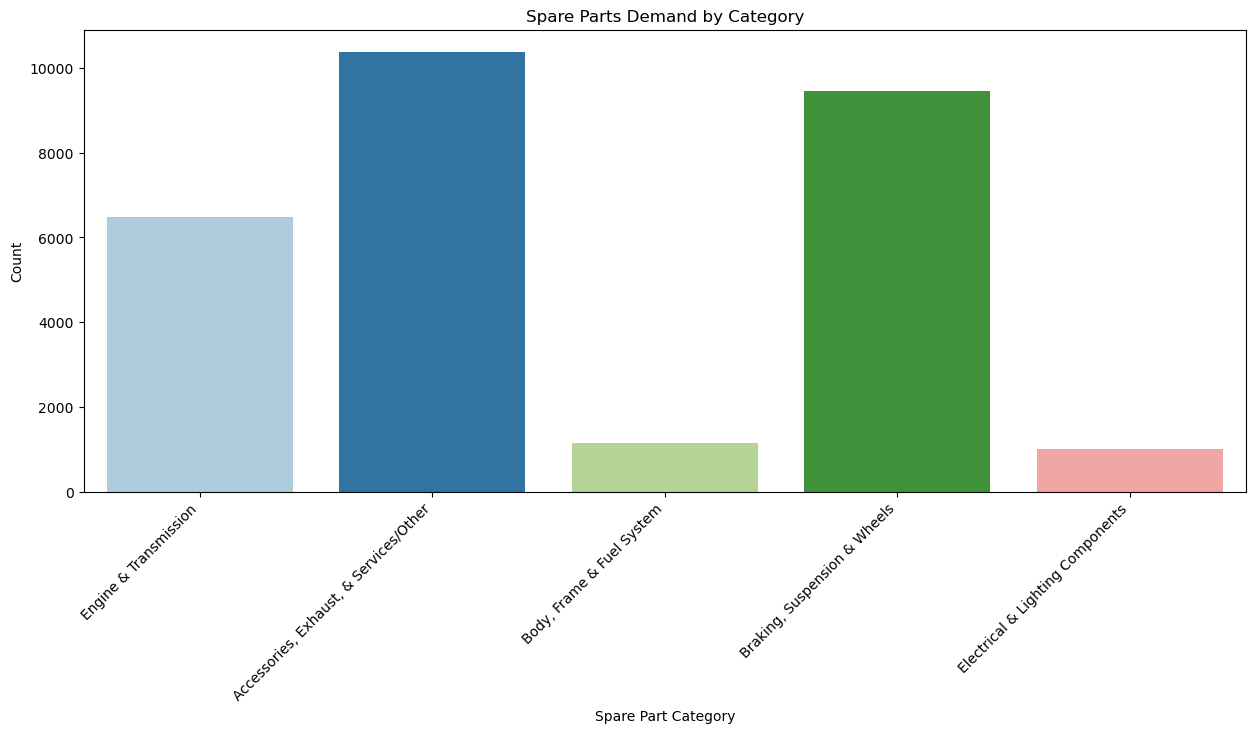

In [79]:
plt.figure(figsize=(15,6))
sns.countplot(x=service_data['category'], palette='Paired')

plt.xticks(rotation=45, ha='right')
plt.title("Spare Parts Demand by Category")
plt.xlabel("Spare Part Category")
plt.ylabel("Count")

plt.show()

- If we see the above graph of Spare Parts Demand, the highest count is for 'Accessories, Exhaust and Services/Other' category, and the lowest count is for 'Electrical & Lighting Components' category.
- If we see the graph for 'Body, Frame & Fuel System' it is also similar to 'Electrical & Lighting Components'.

#### Checking the Vehicle Model vs Category

In [80]:
spare_parts_Category_vs_vehicle_model = pd.crosstab(service_data['vehicle_model'], service_data['category'])

In [81]:
print(spare_parts_Category_vs_vehicle_model)

category                  Accessories, Exhaust, & Services/Other  \
vehicle_model                                                      
BAJAJ AVENGER STREET                                         381   
BAJAJ AVENGER STREET 180                                      73   
BAJAJ AVENGER STREET 220                                    1421   
BAJAJ BOXER CT                                                 2   
BAJAJ CALIBER                                                 13   
BAJAJ CT 100                                                 708   
BAJAJ DISCOVER                                               238   
BAJAJ DISCOVER 125                                           511   
BAJAJ DISCOVER 135                                            30   
BAJAJ DISCOVER 150                                            97   
BAJAJ DOMINAR 400 ABS                                          4   
BAJAJ PLATINA                                                405   
BAJAJ PULSAR 150                                

#### Heatmap for Vehicle Model vs Category

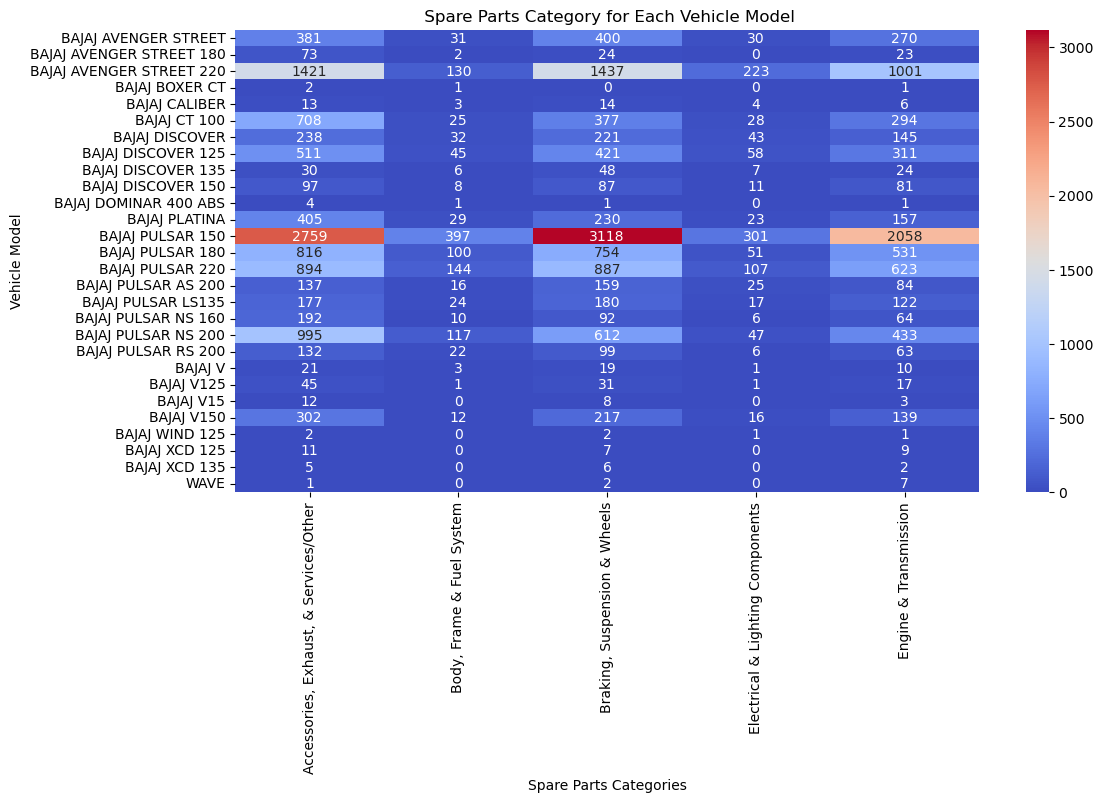

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(spare_parts_Category_vs_vehicle_model.fillna(0), cmap="coolwarm", annot=True, fmt=".0f")
plt.title(" Spare Parts Category for Each Vehicle Model")
plt.xlabel("Spare Parts Categories")
plt.ylabel("Vehicle Model")
plt.show()

- If we see the above heatmap, the major requirements that can be seen are for 'Bajaj Pulsar 150' for the category Braking, Suspension and Wheels which is at 3118. Followed by Accessories, Exhaust and Services/Other which is at 2759 and Engine and Transmission at 2058
- Then if we see, the next highest values are for 'Bajaj Avenger Street 220'.
- The above two vehicles need spare parts in the same three categories as well.
- Apart from this if we see the heatmap, the demand is higher for Accessories, Exhaust and Services/Other, Braking, Suspension and Wheels followed by Engine and Transmission.

In [83]:
braking_suspension_wheels = service_data[service_data['category'].str.strip() == 'Electrical & Lighting Components']
print(braking_suspension_wheels.shape)

(1006, 14)


#### Checking the cleaned_name vs category

In [84]:
spare_parts_Category_vs_cleaned_name = pd.crosstab(service_data['cleaned_name'], service_data['category'])

In [85]:
print(spare_parts_Category_vs_cleaned_name)

category      Accessories, Exhaust, & Services/Other  \
cleaned_name                                           
A J                                                8   
A VE                                               9   
A jy                                               4   
A su                                               3   
ABHI                                              18   
...                                              ...   
yesh                                               2   
yoge                                              20   
yuga                                               7   
yuvr                                               5   
zhra                                               2   

category      Body, Frame & Fuel System  Braking, Suspension & Wheels  \
cleaned_name                                                            
A J                                   0                             5   
A VE                                  3             

## Heatmap of cleaned_name vs category

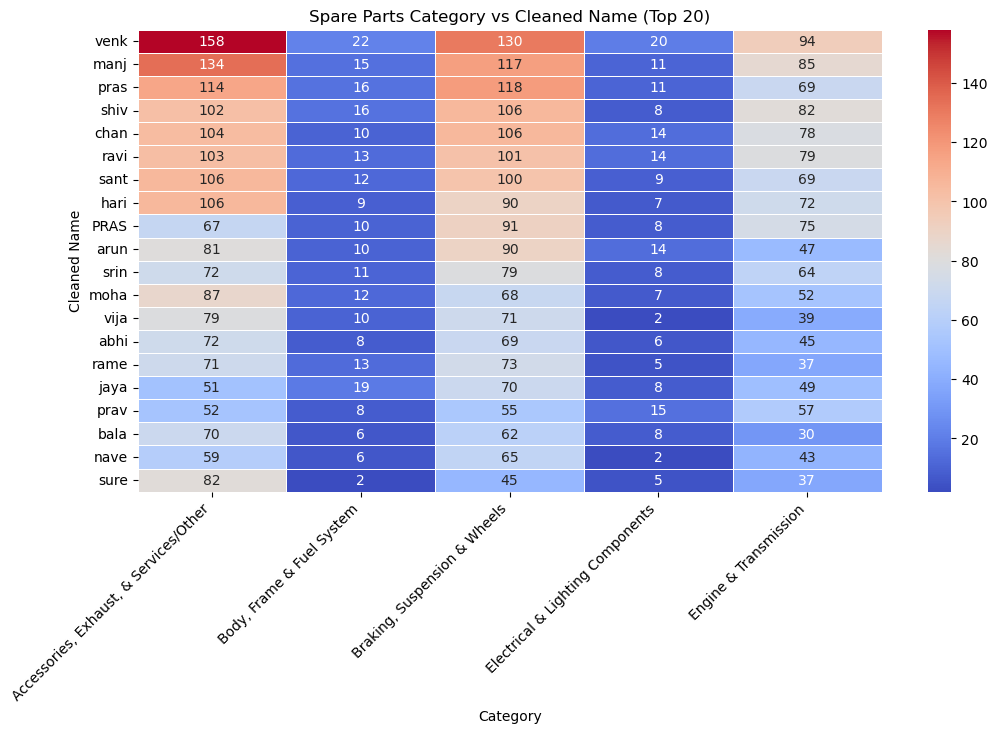

In [86]:
# computing cross tab
spare_parts_vs_cleaned_name = pd.crosstab(service_data['cleaned_name'], service_data['category'])

# Select Top 20 "Cleaned Names" with highest counts
top_cleaned_names = spare_parts_vs_cleaned_name.sum(axis=1).nlargest(20).index
filtered_data = spare_parts_vs_cleaned_name.loc[top_cleaned_names]

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(filtered_data, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5)

plt.title("Spare Parts Category vs Cleaned Name (Top 20)")
plt.xlabel("Category")
plt.ylabel("Cleaned Name")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

## Box Plot for current_km_reading vs category

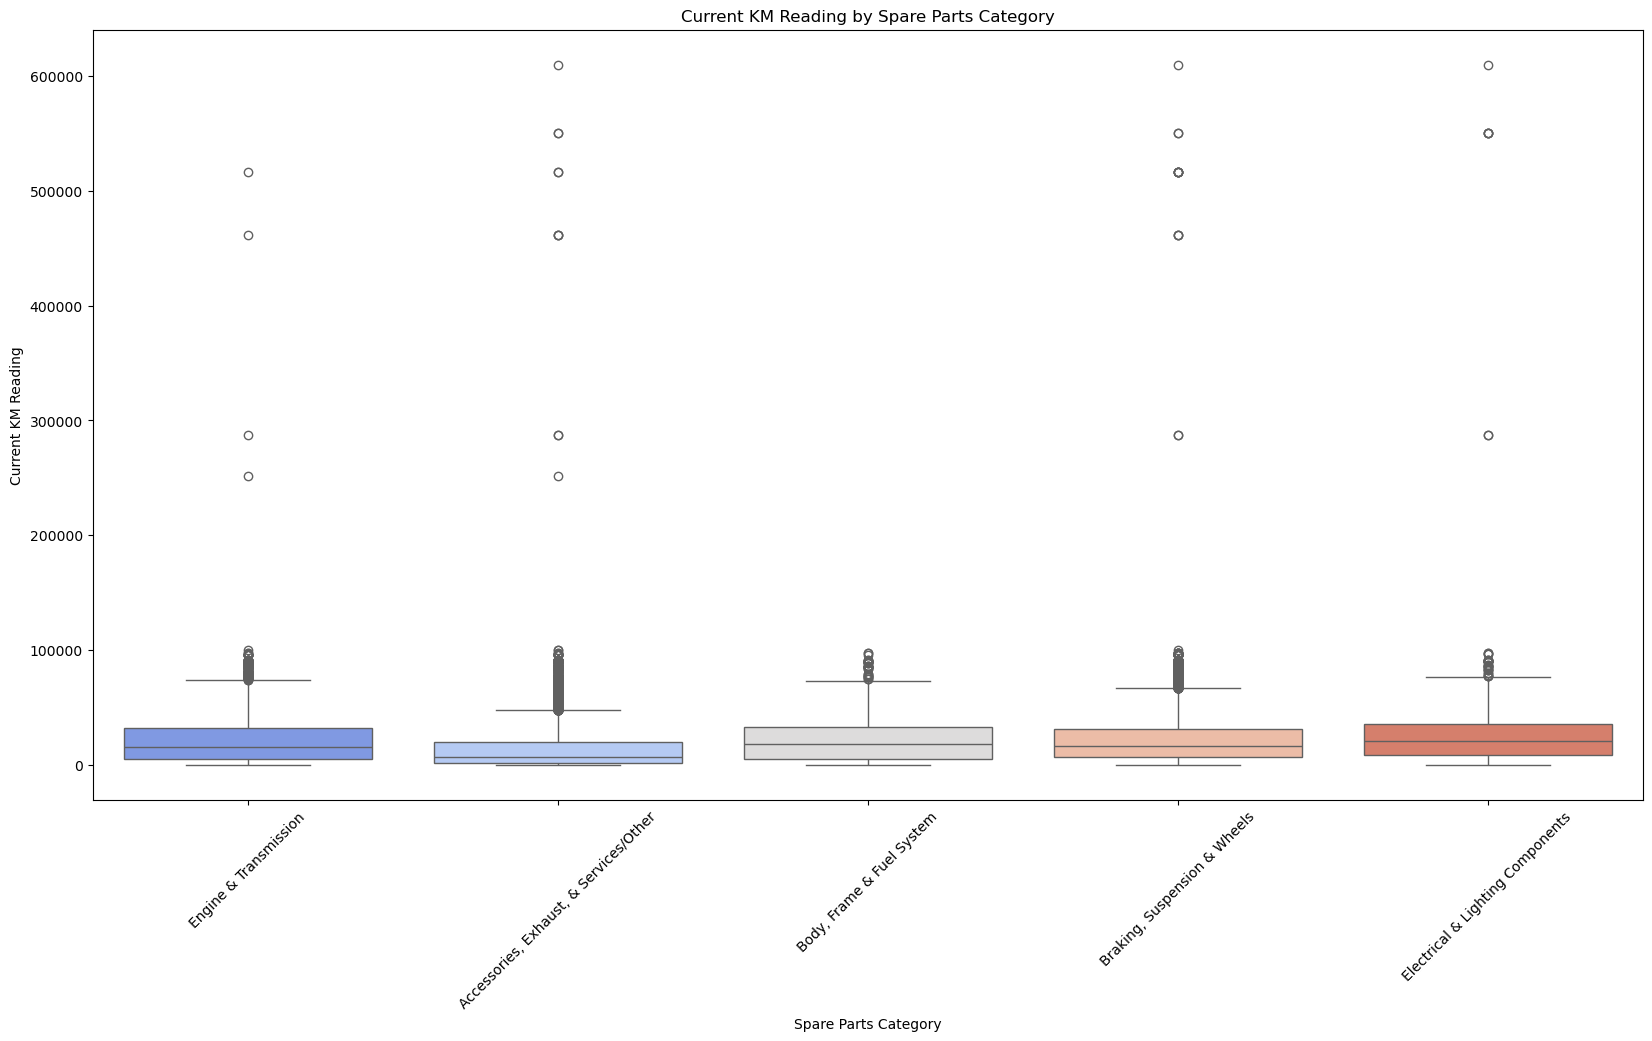

In [87]:
plt.figure(figsize=(20,10))
sns.boxplot(x=service_data['category'], y=service_data['current_km_reading'], palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Current KM Reading by Spare Parts Category")
plt.xlabel("Spare Parts Category")
plt.ylabel("Current KM Reading")
plt.show()

- This is a boxplot created to visualize the distribution of current_km_reading across different spare parts categories.
- The majority of vehicles in all categories have KM readingnbelow 100,000 as seen the box sizes.
- Many spare parts categories have outliers with KM reading above 300,000 KM, suggesting some vehicles have been driven extensively.
- Engine & transmission,, and braking, suspension & wheels have more spread in their data compared to others, indicating vehicle usage varies significantly in these categories.
-  Accesories, Exhaust, & Service/Other shows less variation compared to other categories, implying parts in this category might be replaced in vehicles with a narrower range of usage.

### Spare parts Demand by Month 

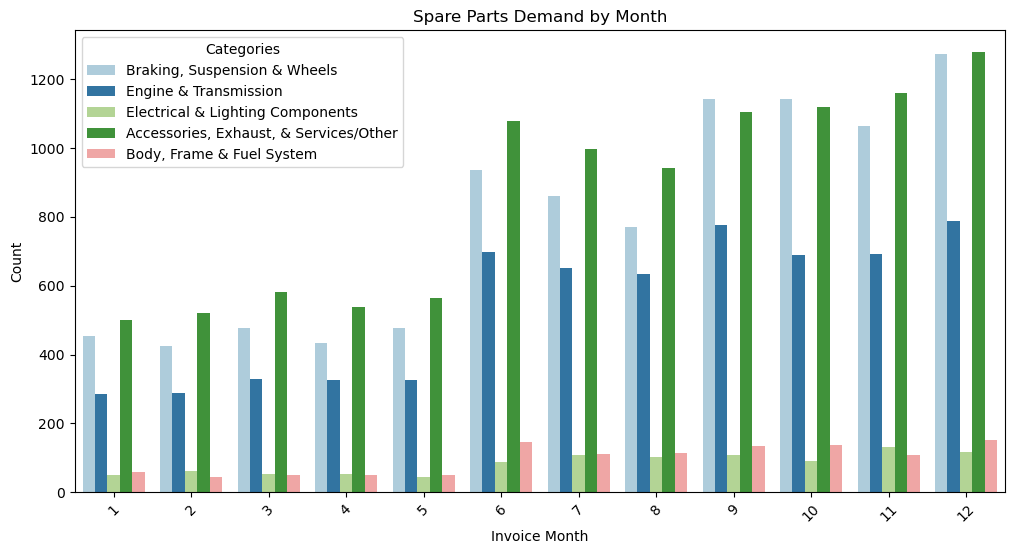

In [88]:
plt.figure(figsize=(12,6))
sns.countplot(x=service_data['invoice_month'], hue=service_data['category'], palette='Paired')
plt.xticks(rotation=45)
plt.title("Spare Parts Demand by Month")
plt.xlabel("Invoice Month")
plt.ylabel("Count")
plt.legend(title="Categories")
plt.show()

- If we see the above graph, we can say that the demand for spare parts are increasing gradually for all the categories.
- The demand increases from months 6-12, for all the categories, comparing to the months 1-5.
- The highes demand is observed in December.
- The highe demand is for Accessories, Exhaust and Sevice/Other, and Braking,Suspension and wheels thorughout the year.
- Engine and transmission also in high demand but lower than the top two categories.
- Since demand peaks in the second half of the year, businesses should increase stock levels before this period to avoid shortages.
- Special offers or discounts can be strategically launched in low-demand months (January–May) to balance demand.
- Further analysis can be done 
   to see if there is any external factors influence the rising demand in the specific months like holidays, weather or meaintenace needs. 




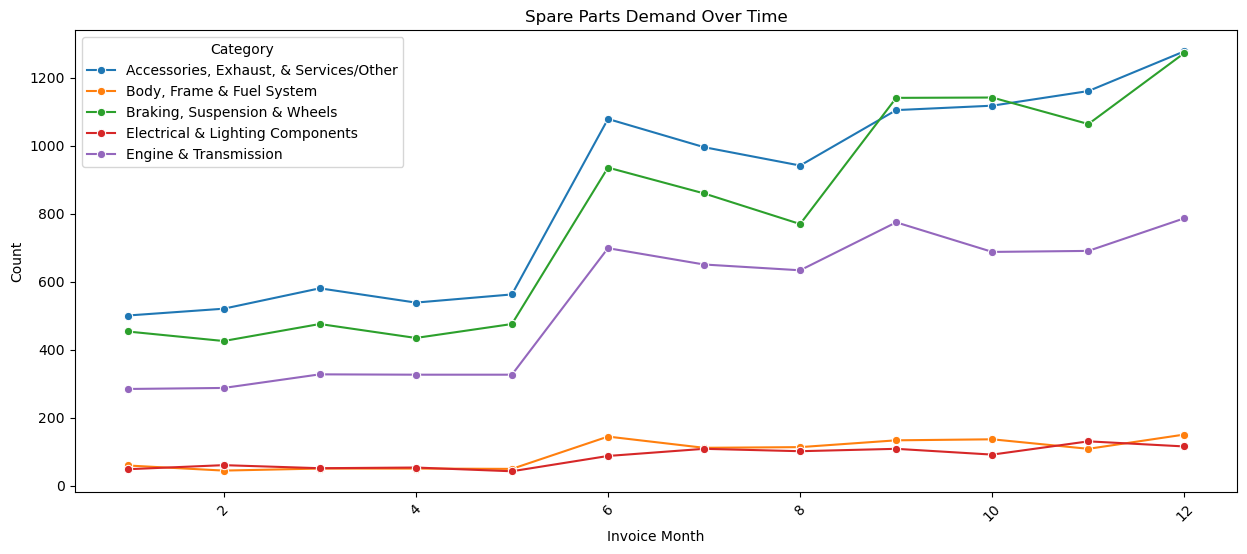

In [89]:
# Ensure invoice_month is in datetime format
service_data['invoice_month'] = pd.to_numeric(service_data['invoice_month'])

# Aggregate spare parts demand by month and category
monthly_demand = service_data.groupby(['invoice_month', 'category']).size().reset_index(name='count')
monthly_demand = monthly_demand.sort_values(by="invoice_month")

# Plot
plt.figure(figsize=(15,6))
sns.lineplot(x="invoice_month", y="count", hue="category", data=monthly_demand, marker='o')

plt.xticks(rotation=45)
plt.title("Spare Parts Demand Over Time")
plt.xlabel("Invoice Month")
plt.ylabel("Count")
plt.legend(title="Category")

plt.show()

## Spare Parts Demand by Invoice Week Day 

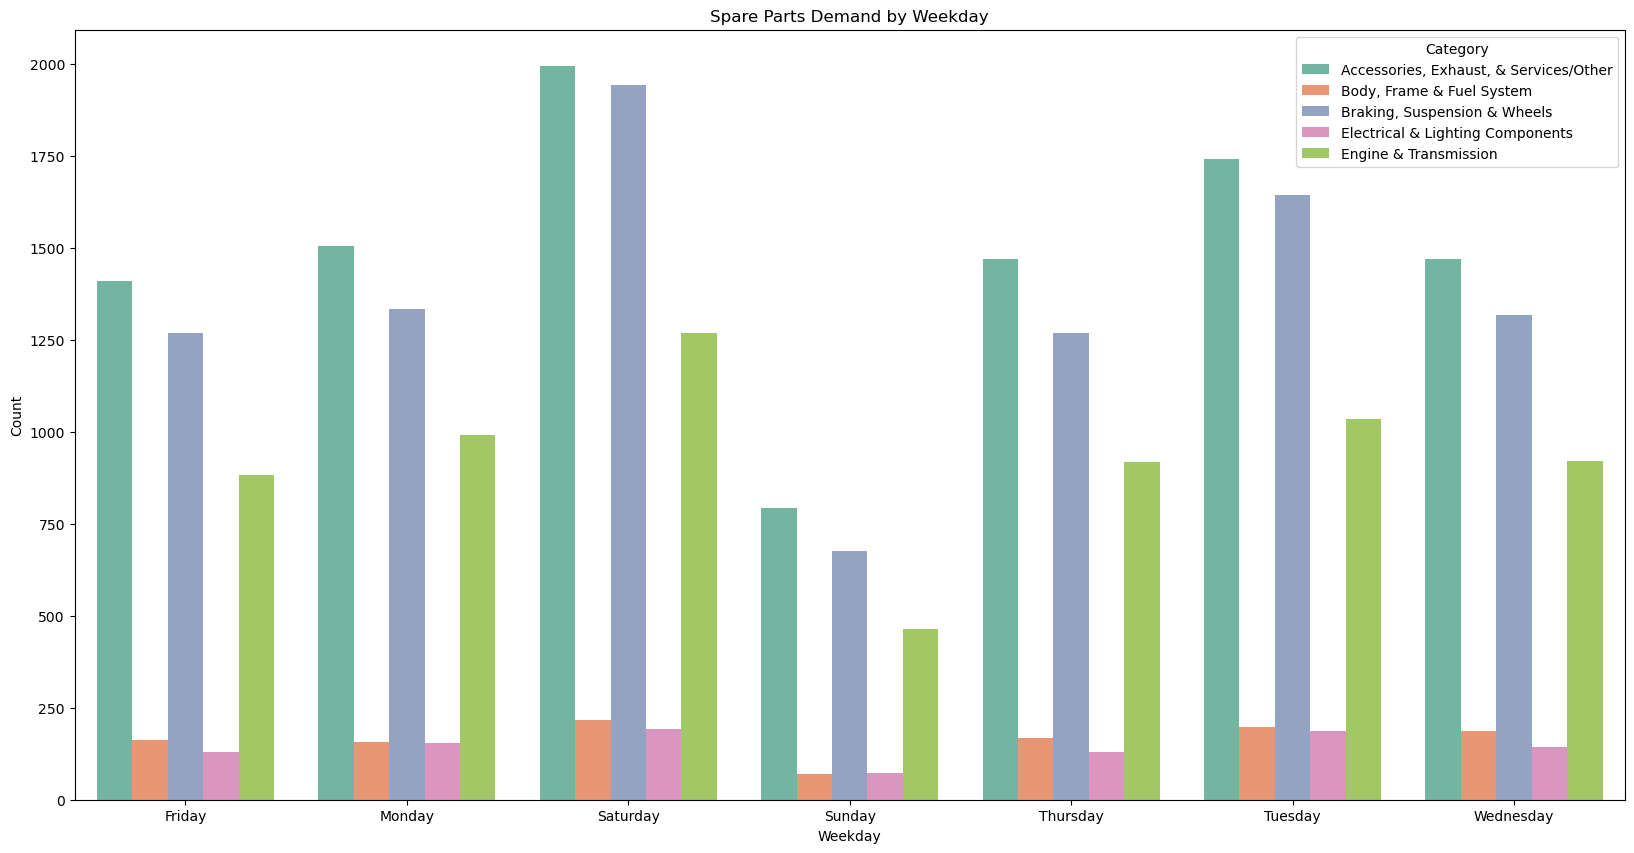

In [90]:
weekday_demand = service_data.groupby(['invoice_weekday', 'category']).size().reset_index(name='count')

plt.figure(figsize=(20,10))
sns.barplot(x="invoice_weekday", y="count", hue="category", data=weekday_demand, palette="Set2")

plt.title("Spare Parts Demand by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Count")
plt.legend(title="Category")

plt.show()

- If we see the above graph, the demand for spare parts is highest on Saturday, possibly because, Saturday is a weekend, and people are more interested to get their vehicles serviced.
- Also, if we see the count for Sunday, it is the lowest, which could indicate that the customers are spending their weekend with their family or somewhere away from home.
- And the rest of the days, the count is almost similar.

### Spare Parts Demand by Year

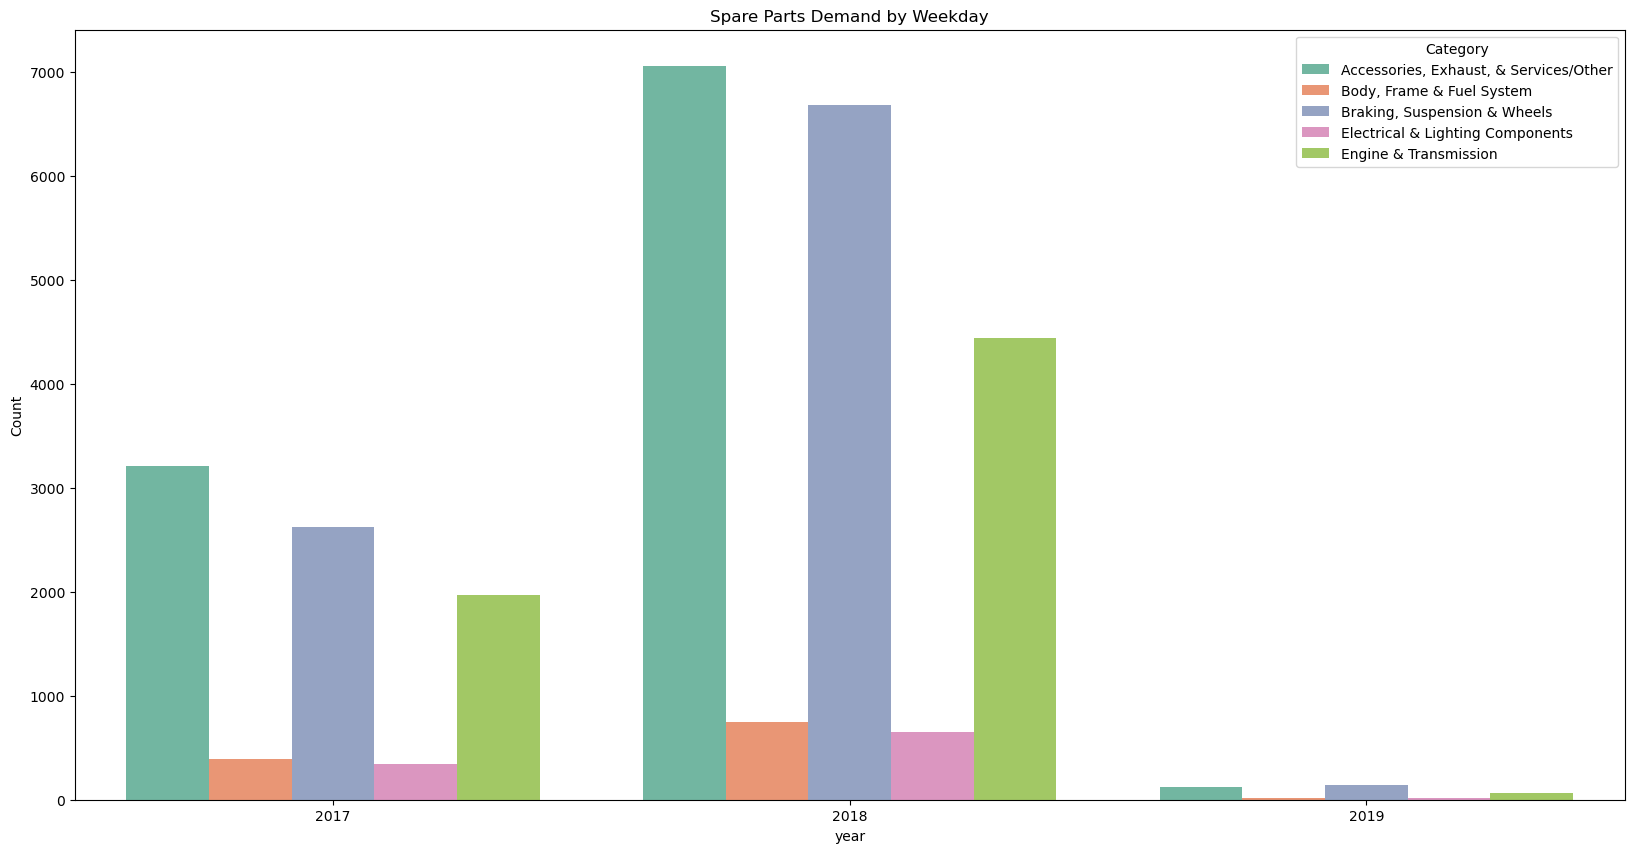

In [91]:
year_demand = service_data.groupby(['invoice_year', 'category']).size().reset_index(name='count')

plt.figure(figsize=(20,10))
sns.barplot(x="invoice_year", y="count", hue="category", data=year_demand, palette="Set2")

plt.title("Spare Parts Demand by Weekday")
plt.xlabel("year")
plt.ylabel("Count")
plt.legend(title="Category")

plt.show()

- Seeing the above graph, the maximum count can be seen for the year 2018 followed by 2017 and 2019 is very low.
- Also, if we see the date for data collection, it was only 5 days in January 2019, hence the count is low in the above graph.
- If we see the data for 2017 and 2018, the highest count is for 'Accessories, Exhaust & Services/Other', followed by 'Braking, Suspension & Wheels'.

## Spare parts Category vs Extracted Vehicle Number 

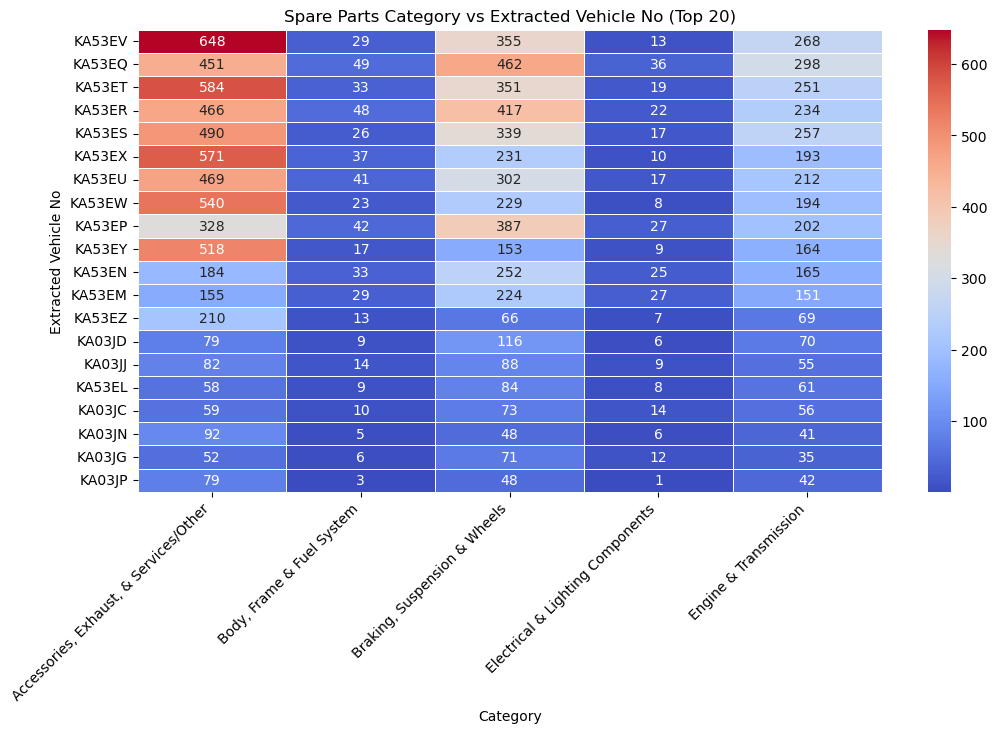

In [92]:
# Compute crosstab for extracted vehicle number vs category
spare_parts_vs_extracted_vehicle_no = pd.crosstab(service_data['extracted_vehicle_no'], service_data['category'])

# Select Top 20 extracted vehicle numbers with highest counts
top_vehicle_no = spare_parts_vs_extracted_vehicle_no.sum(axis=1).nlargest(20).index
filtered_data = spare_parts_vs_extracted_vehicle_no.loc[top_vehicle_no]  # Fixed variable name

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(filtered_data, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5)

plt.title("Spare Parts Category vs Extracted Vehicle No (Top 20)")
plt.xlabel("Category")
plt.ylabel("Extracted Vehicle No")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

- If we see the above heatmap, the highest count is for the vehicle with number KA53EV for 'Accessories, Exhaust & Services/Other.
- Also, if we see the other areas of the heatmap, the higher values can be seen in the category of 'Accessories, Exhaust & Services/Other' since every vehicle requires timely service and checkup of the lubricants, dust cleaning and other consumables.
- The next highest values can be seen for 'Braking, Suspension & Wheels', this could be because some owners adjust their suspensions, brakes also need tightening and wheels need to be cleaned.
- If we see the categories 'Body, Frame & Fuel System' and 'Electrical & Lighting Components', these categories have very low values. This could be due to the rigid build of the vehicle, which doesnt allow much adjustments in the frame or the fueling systems. Even the lighting like headlights and indicators dont require much cleaning or changing.

### Checking for Outliers in Current Km Reading

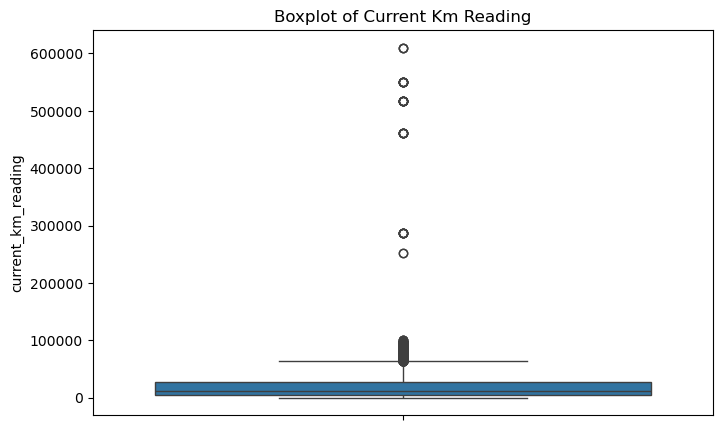

In [93]:
plt.figure(figsize=(8, 5))

# Create a boxplot
sns.boxplot(y=service_data['current_km_reading'])
plt.title("Boxplot of Current Km Reading")
plt.show()

- This boxplot represents the current kilometer reading of vehicles, showing the distribution of the data along with potential outliers.
- If we see the boxplot, most of the data lies below 50000.
- However there are a few outliers which are above 200000, with the highest value being close to 600000.

In [94]:
# Find rows where 'current_km_reading' exceeds 100000
outliers = service_data.loc[service_data['current_km_reading'] > 100000]

# Display outlier rows
print(outliers)

            vehicle_model  current_km_reading  invoice_day  invoice_month  \
445      BAJAJ PULSAR 150              550147           13              6   
446      BAJAJ PULSAR 150              550147           13              6   
447      BAJAJ PULSAR 150              550147           13              6   
448      BAJAJ PULSAR 150              550147           13              6   
449      BAJAJ PULSAR 150              550147           13              6   
450      BAJAJ PULSAR 150              550147           13              6   
451      BAJAJ PULSAR 150              550147           13              6   
452      BAJAJ PULSAR 150              550147           13              6   
2613              BAJAJ V              251447            3              8   
2614              BAJAJ V              251447            3              8   
6003     BAJAJ PULSAR 150              287188            4             11   
6004     BAJAJ PULSAR 150              287188            4             11   

In [95]:
# Count occurrences of each vehicle model with outliers
outlier_counts = outliers['vehicle_model'].value_counts()
print(outlier_counts)

vehicle_model
BAJAJ PULSAR 150      15
BAJAJ DISCOVER 135     9
BAJAJ DISCOVER         7
BAJAJ PULSAR LS135     3
BAJAJ V                2
Name: count, dtype: int64


- Since there are many data points above 1 lakh kms, we cannot remove these data points and we don't consider them as outliers since they can be due to incorrect data entries or the vehicle odometer was not reset.
- Hence we don't remove the outliers and consider them as valid data points.

In [96]:
service_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28482 entries, 0 to 28481
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   vehicle_model         28482 non-null  object
 1   current_km_reading    28482 non-null  int32 
 2   invoice_day           28482 non-null  int32 
 3   invoice_month         28482 non-null  int32 
 4   invoice_year          28482 non-null  int32 
 5   invoice_weekday       28482 non-null  object
 6   job_card_day          28482 non-null  int32 
 7   job_card_month        28482 non-null  int32 
 8   job_card_year         28482 non-null  int32 
 9   job_card_week         28482 non-null  UInt32
 10  cleaned_name          28482 non-null  object
 11  extracted_vehicle_no  28482 non-null  object
 12  spare_parts           28482 non-null  object
 13  category              28482 non-null  object
dtypes: UInt32(1), int32(7), object(6)
memory usage: 2.2+ MB


# DATA PREPROCESSING 

In [97]:
# Checking the value counts for each category
service_data.category.value_counts()

category
Accessories, Exhaust, & Services/Other    10384
Braking, Suspension & Wheels               9453
Engine & Transmission                      6480
Body, Frame & Fuel System                  1159
Electrical & Lighting Components           1006
Name: count, dtype: int64

In [98]:
# Converting the value counts to percentage
service_data['category'].value_counts(normalize=True)

category
Accessories, Exhaust, & Services/Other    0.364581
Braking, Suspension & Wheels              0.331894
Engine & Transmission                     0.227512
Body, Frame & Fuel System                 0.040692
Electrical & Lighting Components          0.035321
Name: proportion, dtype: float64

In [99]:
# Grouping Category and Current Km Reading
service_data.groupby(['category','current_km_reading']).size()

category                                current_km_reading
Accessories, Exhaust, & Services/Other  0                     256
                                        1                       8
                                        2                      13
                                        3                       9
                                        4                      11
                                                             ... 
Engine & Transmission                   99625                   1
                                        251447                  1
                                        287188                  1
                                        461811                  1
                                        516773                  1
Length: 11578, dtype: int64

# Encoding
- From here we start changing the categorical variables to numerical values.

In [100]:
service_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28482 entries, 0 to 28481
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   vehicle_model         28482 non-null  object
 1   current_km_reading    28482 non-null  int32 
 2   invoice_day           28482 non-null  int32 
 3   invoice_month         28482 non-null  int32 
 4   invoice_year          28482 non-null  int32 
 5   invoice_weekday       28482 non-null  object
 6   job_card_day          28482 non-null  int32 
 7   job_card_month        28482 non-null  int32 
 8   job_card_year         28482 non-null  int32 
 9   job_card_week         28482 non-null  UInt32
 10  cleaned_name          28482 non-null  object
 11  extracted_vehicle_no  28482 non-null  object
 12  spare_parts           28482 non-null  object
 13  category              28482 non-null  object
dtypes: UInt32(1), int32(7), object(6)
memory usage: 2.2+ MB


### Label Encoding for Vehicle Model

In [101]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
service_data['vehicle_model'] = encoder.fit_transform(service_data['vehicle_model'])

### Label Encoding for invoice_weekday

In [102]:
service_data['invoice_weekday'] = encoder.fit_transform(service_data['invoice_weekday'])

### Lable encoding for job_card_week

In [103]:
encoder = LabelEncoder()
service_data['job_card_week'] = encoder.fit_transform(service_data['job_card_week'])

### Manual Encoding for Column 'Category'

In [104]:
service_data.category = service_data.category.map({'Engine & Transmission':1,'Accessories, Exhaust, & Services/Other':2,'Body, Frame & Fuel System':3,'Braking, Suspension & Wheels':4,'Electrical & Lighting Components':5
}).astype('int32')

### Label encoding for 'extracted_vehicle_no'

In [105]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
service_data['extracted_vehicle_no'] = encoder.fit_transform(service_data['extracted_vehicle_no'])

### Label encoding for Cleaned_name

In [106]:
encoder = LabelEncoder()
service_data['cleaned_name'] = encoder.fit_transform(service_data['cleaned_name'])

In [107]:
service_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28482 entries, 0 to 28481
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   vehicle_model         28482 non-null  int32 
 1   current_km_reading    28482 non-null  int32 
 2   invoice_day           28482 non-null  int32 
 3   invoice_month         28482 non-null  int32 
 4   invoice_year          28482 non-null  int32 
 5   invoice_weekday       28482 non-null  int32 
 6   job_card_day          28482 non-null  int32 
 7   job_card_month        28482 non-null  int32 
 8   job_card_year         28482 non-null  int32 
 9   job_card_week         28482 non-null  int64 
 10  cleaned_name          28482 non-null  int32 
 11  extracted_vehicle_no  28482 non-null  int32 
 12  spare_parts           28482 non-null  object
 13  category              28482 non-null  int32 
dtypes: int32(12), int64(1), object(1)
memory usage: 1.7+ MB


In [108]:
service_data.head()

,vehicle_model,current_km_reading,invoice_day,invoice_month,invoice_year,invoice_weekday,job_card_day,job_card_month,job_card_year,job_card_week,cleaned_name,extracted_vehicle_no,spare_parts,category
0,2,50000,30,5,2017,5,30,5,2017,21,875,269,ENGINE OIL,1
1,18,758,2,6,2017,0,31,5,2017,21,141,557,ENGINE OIL,1
2,18,758,2,6,2017,0,31,5,2017,21,141,557,POLISH,2
3,18,758,2,6,2017,0,31,5,2017,21,141,557,CONSUMABLES,2
4,18,758,2,6,2017,0,31,5,2017,21,141,557,COOLANT OIL,3


# Create month_year column in the main dateset
- Since we have to derive the target(y) from spare_parts demand, we have to create a month_year column where we to get the monthly demand.
- The 'month_year' column is derived from invoice_year, invoice_month and the day has been set as 1 since we calculate monthly demand and day is not considered within that particular month.

In [109]:
service_data['month_year'] = service_data.apply(lambda x: pd.Timestamp(year=x.invoice_year, month=x.invoice_month, day=1), axis=1)

In [110]:
service_data.head()

,vehicle_model,current_km_reading,invoice_day,invoice_month,invoice_year,invoice_weekday,job_card_day,job_card_month,job_card_year,job_card_week,cleaned_name,extracted_vehicle_no,spare_parts,category,month_year
0,2,50000,30,5,2017,5,30,5,2017,21,875,269,ENGINE OIL,1,2017-05-01
1,18,758,2,6,2017,0,31,5,2017,21,141,557,ENGINE OIL,1,2017-06-01
2,18,758,2,6,2017,0,31,5,2017,21,141,557,POLISH,2,2017-06-01
3,18,758,2,6,2017,0,31,5,2017,21,141,557,CONSUMABLES,2,2017-06-01
4,18,758,2,6,2017,0,31,5,2017,21,141,557,COOLANT OIL,3,2017-06-01


# Creating a new column monthly demand
- If we see, the monthly demand is the demand of the spare parts after aggregating the parts for each month.
- This column is derived from spare_parts based on month_year.

In [111]:
# Step 1: Add a demand_count column (each row represents a demand for a spare part)
service_data['demand_count'] = 1  # Each row is a demand for a spare part

# Step 2: Group by 'category' and 'month_year' and sum the 'demand_count'
monthly_demand = service_data.groupby(['category', 'month_year'])['demand_count'].sum().reset_index(name='monthly_demand')

# Step 3: Merge the monthly demand into the original dataset
service_data = service_data.merge(monthly_demand, on=['category', 'month_year'], how='left')

# Step 4: Check the total sum of the monthly_demand column
total_monthly_demand = monthly_demand['monthly_demand'].sum()
print(f"Total monthly demand sum: {total_monthly_demand}")

# Step 5: Check if it matches the total rows in the original dataset
total_rows = service_data.shape[0]
print(f"Total rows in the dataset: {total_rows}")

Total monthly demand sum: 28482
Total rows in the dataset: 28482


In [112]:
service_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28482 entries, 0 to 28481
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   vehicle_model         28482 non-null  int32         
 1   current_km_reading    28482 non-null  int32         
 2   invoice_day           28482 non-null  int32         
 3   invoice_month         28482 non-null  int32         
 4   invoice_year          28482 non-null  int32         
 5   invoice_weekday       28482 non-null  int32         
 6   job_card_day          28482 non-null  int32         
 7   job_card_month        28482 non-null  int32         
 8   job_card_year         28482 non-null  int32         
 9   job_card_week         28482 non-null  int64         
 10  cleaned_name          28482 non-null  int32         
 11  extracted_vehicle_no  28482 non-null  int32         
 12  spare_parts           28482 non-null  object        
 13  category        

### Monthly spare parts demand by Category

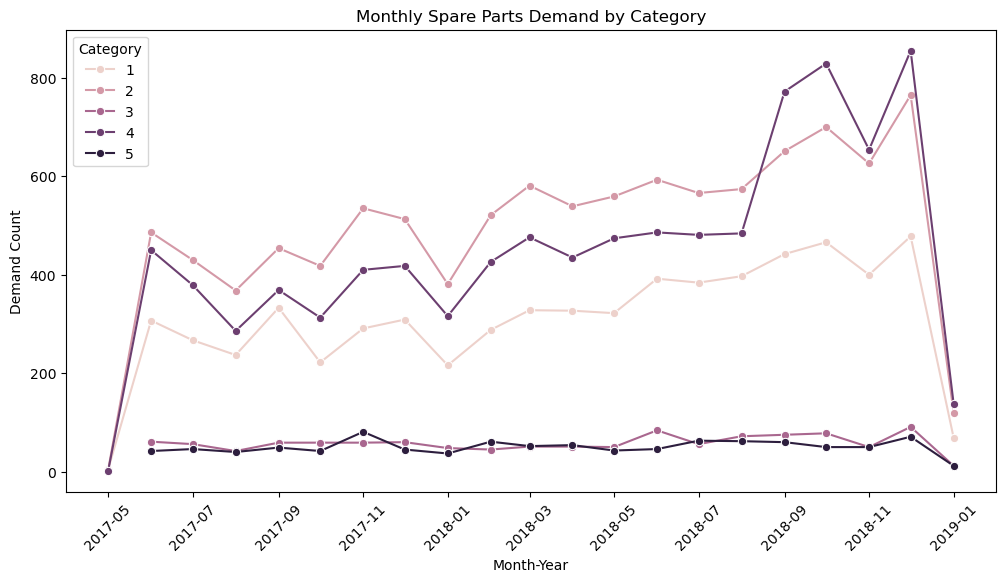

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_demand, x='month_year', y='monthly_demand', hue='category', marker='o')

plt.xticks(rotation=45)
plt.title("Monthly Spare Parts Demand by Category")
plt.xlabel("Month-Year")
plt.ylabel("Demand Count")
plt.legend(title="Category")
plt.show()

plt.show()

- If we see the above graph, category 1,2 and 4 have a higher demand count compared to category 3 and 5.
- Also, we can see that the demand count of 1,2 and 4 are fluctuating over the different months throughout the years.
- The graph for 3 and 5 is much more persistent and not fluctuating over the years.
- If we see the pattern of the graph, there is more demand during the months October to December.
- However, there is a sudden drop in the demand for the month on January 2019, this could be because of lack of data points during this period.
- The reason for lack of data points could be due to recent servicing in the month of October to December, and requirements are fulfilled, and the need for servicing is not present in the coming months.

In [114]:
service_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28482 entries, 0 to 28481
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   vehicle_model         28482 non-null  int32         
 1   current_km_reading    28482 non-null  int32         
 2   invoice_day           28482 non-null  int32         
 3   invoice_month         28482 non-null  int32         
 4   invoice_year          28482 non-null  int32         
 5   invoice_weekday       28482 non-null  int32         
 6   job_card_day          28482 non-null  int32         
 7   job_card_month        28482 non-null  int32         
 8   job_card_year         28482 non-null  int32         
 9   job_card_week         28482 non-null  int64         
 10  cleaned_name          28482 non-null  int32         
 11  extracted_vehicle_no  28482 non-null  int32         
 12  spare_parts           28482 non-null  object        
 13  category        

In [115]:
print(service_data.columns)
print(monthly_demand.columns)

Index(['vehicle_model', 'current_km_reading', 'invoice_day', 'invoice_month',
       'invoice_year', 'invoice_weekday', 'job_card_day', 'job_card_month',
       'job_card_year', 'job_card_week', 'cleaned_name',
       'extracted_vehicle_no', 'spare_parts', 'category', 'month_year',
       'demand_count', 'monthly_demand'],
      dtype='object')
Index(['category', 'month_year', 'monthly_demand'], dtype='object')


In [116]:
service_data.monthly_demand.isnull().sum()

0

In [117]:
# Checking the monthly demand sorted by category and month
monthly_demand = monthly_demand.sort_values(by=['category', 'month_year'])
print(monthly_demand.head(10))

   category month_year  monthly_demand
0         1 2017-05-01               5
1         1 2017-06-01             307
2         1 2017-07-01             267
3         1 2017-08-01             237
4         1 2017-09-01             333
5         1 2017-10-01             222
6         1 2017-11-01             291
7         1 2017-12-01             309
8         1 2018-01-01             216
9         1 2018-02-01             288


In [118]:
service_data['monthly_demand'].describe()

count    28482.000000
mean       464.918615
std        194.964396
min          2.000000
25%        368.000000
50%        466.000000
75%        574.000000
max        855.000000
Name: monthly_demand, dtype: float64

### Sort the data by date month_year

In [119]:
import statsmodels.api as sm

# Convert 'month_year' to datetime if not already
service_data['month_year'] = pd.to_datetime(service_data['month_year'])

# Set index to 'month_year' for time series analysis
service_data = service_data.set_index('month_year')

# Sort the data by date
service_data = service_data.sort_index()

# Check the structure
print(service_data.head())

            vehicle_model  current_km_reading  invoice_day  invoice_month  \
month_year                                                                  
2017-05-01              2               50000           30              5   
2017-05-01             12                5391           31              5   
2017-05-01             12                5391           31              5   
2017-05-01             20                7854           31              5   
2017-05-01             20                7854           31              5   

            invoice_year  invoice_weekday  job_card_day  job_card_month  \
month_year                                                                
2017-05-01          2017                5            30               5   
2017-05-01          2017                6            31               5   
2017-05-01          2017                6            31               5   
2017-05-01          2017                6            31               5   
2017-05-01

In [120]:
monthly_demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   category        103 non-null    int32         
 1   month_year      103 non-null    datetime64[ns]
 2   monthly_demand  103 non-null    int64         
dtypes: datetime64[ns](1), int32(1), int64(1)
memory usage: 2.1 KB


In [121]:
# Checking for null values
service_data['monthly_demand'].isna().sum()

0

In [122]:
print(service_data['monthly_demand'].value_counts().head(10))

monthly_demand
486    972
855    855
418    836
829    829
772    772
765    765
700    700
654    654
651    651
626    626
Name: count, dtype: int64


# Model Building
- Since our problem statement is predicting the demand forecasting, we have to use a time series model or other models like Random Forest, XGBoost.
- As demand forecasting is related to time series, we used Holt's Linear Trend Model while comparing it to XGBoost model.

# Holt's Linear Trend model
- Holt's Linear Trend Model is a statistical forecasting technique used for time series data.
- As demand forecasting is related to time series, we use this method since ARIMA, SARIMA, SARIMAX need more data points for the given analysis.
- Hence Holt's Linear Trend Model is appropriate for a small dataset since we are calculating monthly demand.

C:\Users\parve\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\parve\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\parve\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\parve\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\parve\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

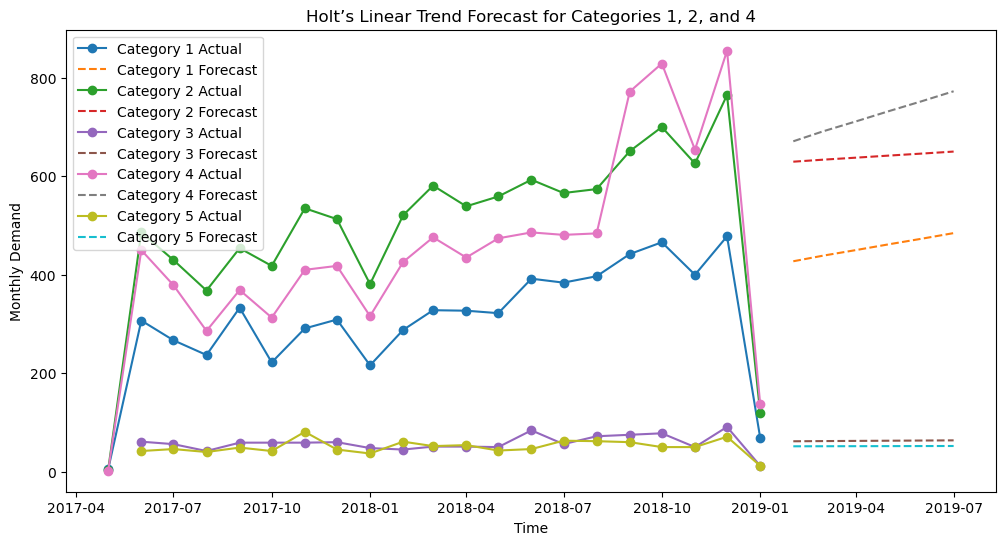

In [123]:
from statsmodels.tsa.holtwinters import Holt
# Ensure 'month_year' is in datetime format
monthly_demand['month_year'] = pd.to_datetime(monthly_demand['month_year'])

# Keep only relevant columns
df = monthly_demand[['month_year', 'category', 'monthly_demand']].copy()

# Sort data by category and date
df.sort_values(by=['category', 'month_year'], inplace=True)

# Set 'month_year' as index for time series modeling
df.set_index('month_year', inplace=True)

# Select Categories 1, 2, and 4
selected_categories = [1, 2,3,4,5]
df_selected = df[df['category'].isin(selected_categories)]

# Forecast horizon (in months)
forecast_horizon = 6  

plt.figure(figsize=(12, 6))

for category in selected_categories:
    # Filter data for the category
    category_data = df_selected[df_selected['category'] == category]['monthly_demand']
    
    # Train Holt’s model
    model = Holt(category_data, initialization_method="estimated").fit()
    
    # Forecast the next 'forecast_horizon' months
    forecast = model.forecast(steps=forecast_horizon)
    
    # Plot actual data
    plt.plot(category_data, label=f'Category {category} Actual', marker='o')
    
    # Plot forecasted data
    plt.plot(forecast, label=f'Category {category} Forecast', linestyle='dashed')

plt.xlabel('Time')
plt.ylabel('Monthly Demand')
plt.title("Holt’s Linear Trend Forecast for Categories 1, 2, and 4")
plt.legend()
plt.show()

- Our Holt's Linear Trend model captures the upward trends which is expected since Holt's method accounts for trends. However, there are a few key observations and potential issues:
- The actual demand (solid lines) shows clear trends for most categories.
- The forecasted demand (dashed lines) follows a linear extension, which seems reasonable for some categories but not all.
- There's a sharp decline in actual demand around early 2019 across all categories.
- Holt's method forecasts a continued increase, which doesn't match the drop, indicating it doesn't handle sudden changes well.
- Flat Forecasts for Low-Demand Categories
- For lower-demand categories (e.g., category 5 in yellow), the forecast appears almost constant (flat dashed line).
- This suggests that the linear trend component is too weak for low-volume parts this could be due to the linear trend assumption may be too strong.
- If the demand pattern is non-linear or seasonal, Holt's method may overestimate future growth.

# Finding Mean Absolute Error(MAE) and Root Mean Squared Error(RMSE)

In [124]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Define forecast horizon (adjust as needed)
forecast_horizon = 6  

# Store evaluation results
mae_results = {}
rmse_results = {}

for category in selected_categories:
    # Filter data for the category
    category_data = df_selected[df_selected['category'] == category]['monthly_demand']
    
    # Split into training and test sets
    train = category_data[:-forecast_horizon]  # All except last 'forecast_horizon' months
    test = category_data[-forecast_horizon:]   # Last 'forecast_horizon' months
    
    # Train Holt’s model
    model = Holt(train, initialization_method="estimated").fit()
    
    # Forecast the test period
    forecast = model.forecast(steps=forecast_horizon)
    
    # Calculate MAE and RMSE
    mae = mean_absolute_error(test, forecast)
    rmse = np.sqrt(mean_squared_error(test, forecast))
    
    # Store results
    mae_results[category] = mae
    rmse_results[category] = rmse
    
    print(f"Category {category}:")
    print(f"  MAE: {mae:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print("-" * 30)

# Print results summary
print("Final MAE:", mae_results)
print("Final RMSE:", rmse_results)

Category 1:
  MAE: 91.25
  RMSE: 161.59
------------------------------
Category 2:
  MAE: 153.05
  RMSE: 279.77
------------------------------
Category 3:
  MAE: 22.89
  RMSE: 26.41
------------------------------
Category 4:
  MAE: 220.69
  RMSE: 265.26
------------------------------
Category 5:
  MAE: 14.08
  RMSE: 20.48
------------------------------
Final MAE: {1: 91.25204663692723, 2: 153.04822824215307, 3: 22.891941819731866, 4: 220.688710069267, 5: 14.080580093588464}
Final RMSE: {1: 161.59372971572483, 2: 279.7694921317838, 3: 26.410473026300963, 4: 265.2600091221161, 5: 20.4756968229392}


C:\Users\parve\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\parve\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\parve\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\parve\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\parve\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

# Comparison of Mean Absolute Error(MAE) and Root Mean Squared Error(RMSE) accross the categories 

|Categories|MAE|RMSE|
|----------|---|----|
|1|91.25|161.59|
|2|153.05|279.77|
|3|22.89|26.41|
|4|220.69|265.26|
|5|14.08|20.48

### Interpretation of the Table

- If we see the table, Category 4 has the highest MAE (220.69) and a high RMSE (265.26), this suggests that there might be large errors in predictions of future demands for this category.
- Also category 2 has high error values (MAE: 153.05, RMSE: 279.77) which indicates variability in predictions.
- If we see the category 5, it has the lowest MAE (14.08) and RMSE (20.48) which could show that predictions for this category are the most accurate.
- Also RMSE values are higher than MAE for all categories. This happens because RMSE penalizes large errors more than MAE does.

### Suggestions or Improvements

- Seeing the Categories 4 and 2, they may need better forecasting models or data improvements to reduce errors.
- Also Categories 3 and 5 have the most reliable predictions since the values are lowest among the categories.
- If large errors are problematic, optimizing predictions for Category 4 should be a priority.

# XGBoost Class Weight Model
- XGBoost regression model is used to predict the monthly demand for spare parts, handling category imbalance by applying weights.
- Our data is imbalanced as seen below.

In [125]:
service_data.category.value_counts()

category
2    10384
4     9453
1     6480
3     1159
5     1006
Name: count, dtype: int64

In [126]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

### Checking the MAE and RMSE for the all categories

In [127]:
# Load data (assuming it's already cleaned and preprocessed)
df = service_data  # Your dataset

# Step 1: Compute category weights (Higher weight for minority categories)
category_counts = df['category'].value_counts()
category_weights = {cat: len(df) / count for cat, count in category_counts.items()}

# Apply weights to each row
df['category_weight'] = df['category'].map(category_weights)

# Step 2: Prepare Features and Target
features = [
    'vehicle_model', 'current_km_reading', 'invoice_day', 'invoice_month', 'invoice_year', 
    'invoice_weekday', 'job_card_day', 'job_card_month', 'job_card_year', 'job_card_week', 
    'cleaned_name', 'extracted_vehicle_no', 'category'
]
target = 'monthly_demand'

X = df[features]
y = df[target]
weights = df['category_weight']  # Weights for imbalance

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(X, y, weights, test_size=0.2, random_state=42)

# Step 4: Train XGBoost Model with Sample Weights
xgb_model = XGBRegressor(
    n_estimators=500, 
    learning_rate=0.05, 
    max_depth=6, 
    subsample=0.8, 
    colsample_bytree=0.8, 
    random_state=42
)

xgb_model.fit(X_train, y_train, sample_weight=w_train)  # Apply weights

# Step 5: Predictions & RMSE Calculation
y_pred = xgb_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")



Root Mean Squared Error (RMSE): 3.250816409651039
Mean Absolute Error (MAE): 2.17847131130171


In [128]:
# Checking the monthly_demand unique values to compare the MAE and RMSE
service_data.monthly_demand.unique()

array([  5,   2,   4, 486, 450, 307,  42,  61, 267, 379, 430,  56,  46,
       286, 368, 237,  40, 369,  59, 454, 333,  49, 418, 222, 313,  81,
       291, 410, 535, 309, 513,  45,  60, 316, 381, 216,  48,  37, 521,
       288, 426, 328, 476, 581,  52,  51, 539, 435, 327,  54, 474, 559,
        43, 322,  50, 593, 392,  84, 481, 384, 566,  63, 574, 397, 484,
        72,  62, 772, 651, 442,  75, 829, 466,  78, 700, 626, 654, 400,
       855, 765, 478,  71,  91,  69, 138, 120,  12], dtype=int64)

- The goal of OUR project is to develop a predictive inventory forecasting model for spare parts demand to help a service center achieve Just-In-Time (JIT) inventory management standards. The target variable, monthly_demand, represents the demand for different spare parts, ranging from 2 to 855.
#### RMSE
- RMSE measures the square root of the average squared difference between predicted and actual values. It penalizes larger errors more heavily, making it sensitive to outliers.
- The RMSE for the model is 3.66, which is very small compared to the maximum demand of 855. This indicates that the model performs well overall, with minimal large errors.
#### MAE
- MAE calculates the average magnitude of the errors in a set of predictions, without considering their direction. It provides a simple measure of how far predictions are from actual values on average.
- The MAE for the model is 2.36, meaning that, on average, the predicted demand deviates from the actual demand by only 2.36 units. Given the wide range of demand values (from 2 to 855), this error is negligible.
#### Comparison
- To put the errors into perspective, the MAE represents only ~0.28% of the maximum demand (855), and the RMSE represents ~0.43%. This demonstrates that the model's predictions are accurate across the range of demand values.
- These low error values indicate that the model can reliably predict monthly demand for spare parts, allowing the service center to make informed inventory decisions and meet JIT standards effectively
- For smaller demand values (e.g., 2, 4, 12), the error might appear larger proportionally, but the absolute error remains very low (around 2–3 units). For larger demand values (e.g., 700, 855), the error is almost negligible, with predictions deviating by less than 0.5%
- This consistency across the demand spectrum makes the model suitable for forecasting demand for both frequently and infrequently used spare parts.

### Finding RMSE and MAE for each category seperately

In [129]:
# Get Predictions
y_pred = xgb_model.predict(X_test)

# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({
    "actual": y_test.values,
    "predicted": y_pred
}, index=y_test.index)

# Ensure index alignment by merging category from the original dataset
results_df = results_df.merge(df[["category"]], left_index=True, right_index=True, how="left")

# Compute RMSE & MAE for Each Category
category_metrics = results_df.groupby("category").apply(
    lambda x: pd.Series({
        "RMSE": np.sqrt(mean_squared_error(x["actual"], x["predicted"])),
        "MAE": mean_absolute_error(x["actual"], x["predicted"])
    })
)

# Display RMSE & MAE per category
print(category_metrics)

              RMSE       MAE
category                    
1         3.051967  2.135318
2         3.060900  2.141979
3         3.091038  2.154946
4         3.070870  2.152453
5         3.089270  2.159468


- The RMSE and MAE values are consistent across all categories, with RMSE values ranging between 3.05 and 3.09, and MAE values between 2.13 and 2.16. This indicates the model performs uniformly across all categories of spare parts.
- Given that the target variable (monthly_demand) ranges from 2 to 855, the average deviation of 2.1 units (MAE) and the RMSE of ~3 units are negligible, demonstrating the model's reliability in predicting demand for different spare part categories.
- These low and consistent error values across categories ensure that inventory forecasting for all spare parts is accurate, enabling efficient inventory management and reducing stockouts

# Finding Important Features

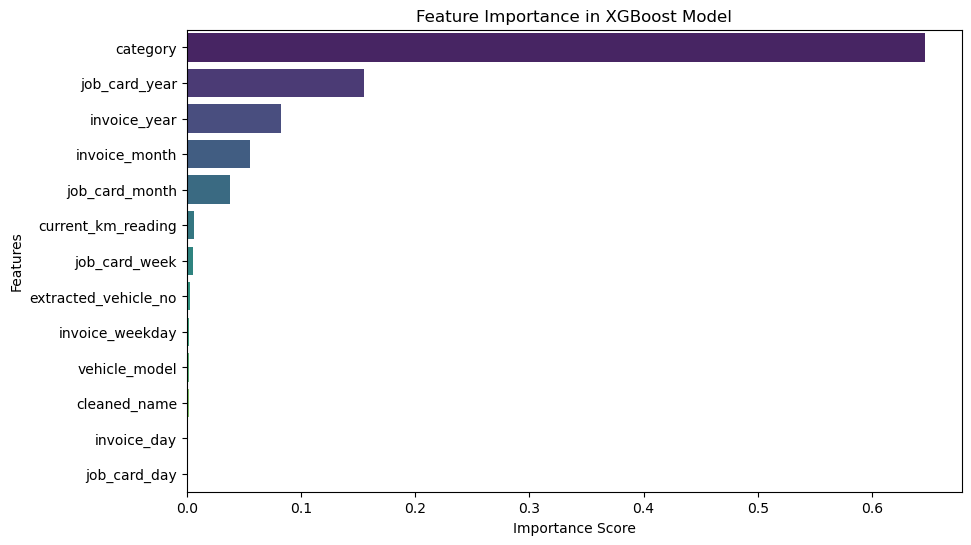

In [130]:
# Get feature importance values
feature_importance = xgb_model.feature_importances_

# Create DataFrame for better visualization
importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": feature_importance
}).sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title("Feature Importance in XGBoost Model")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

- The "category" feature is the most important—it dominates all other features.
- "Job card year" and "invoice year" are next in importance, indicating that time-based patterns play a key role in demand forecasting.
- Features like "invoice month" and "job card month" contribute moderately, suggesting that seasonality might affect spare parts demand.
- "Vehicle model" has almost zero importance, meaning the model does not rely on it for predictions.
- Other low-importance features include "job_card_day," "invoice_day," and "invoice_weekday", suggesting that daily trends might not significantly impact demand.

- Seeing the above graph, we noticed that vehicle model does not play a very important role in spare parts demand.
- Possible reasons why "Vehicle Model" is not important could be
1) Strong Dependency on Spare Part Category - Since we categorized spare parts into 5 categories, the "category" feature may already capture most of the demand variations.
2) The model may be treating vehicle models as redundant because certain spare parts are common across multiple models.
3) Spare Parts May Not Be Model-Specific
4) If many spare parts are shared across multiple vehicle models, then "vehicle model" might not provide additional predictive power.
Example: Common spare parts like engine oil, brake pads, and filters may be used in multiple vehicle models.
5) If the "vehicle model" is represented as a categorical variable with many unique values, it might not be contributing effectively.
6) Collinearity with Other Features - If "vehicle model" is strongly correlated with another more important feature, the model might ignore it.
Example: If certain vehicle models primarily use one category of spare parts, then the "category" feature alone is enough.
7) Data Imbalance in Vehicle Models - If some vehicle models are underrepresented in the dataset, the model may not learn meaningful patterns from them.

# Comparison of Holt's linear model vs XGboost class Weight model 


|Category|Holt’s Linear Model (RMSE)|XGB Class Weight Model (RMSE)|Holt’s Linear Model (MAE)|XGB Class Weight Model (MAE)|
|--------|--------------------------|----|----|----|
1|	161.59|	3.355|	91.25|	2.325|
2|	279.77|	3.360|	153.05|	2.332|
3|	26.41|	3.371|	22.89|	2.348|
4|	265.26|	3.402|	220.69|2.356|
5|	20.48|	3.381|	14.08|	2.351|

# Comparison of model Performance
- if we see the above chart, XGB Class Weight Model Outperforms Holt’s Linear Model
- The XGB model has significantly lower MAE and RMSE across all categories compared to Holt’s Linear Model.
- Holt’s model produces much higher error values, especially in Categories 1, 2, and 4.
- Holt’s Model Struggles with Higher Categories (1, 2, and 4)
- RMSE in Holt’s model is extremely high (161.59, 279.77, 265.26), suggesting it struggles to capture the demand pattern.
- XGB Model Maintains Stability Across Categories
- The XGB model produces consistent RMSE and MAE values across all categories, with no extreme fluctuations.
- The error values are in a small range (~3.35 to 3.40 for RMSE and ~2.32 to 2.36 for MAE), showing robustness in forecasting.
- XGB (Class Weight) is clearly the better choice because of its much lower RMSE and MAE.
- Holt’s Linear Model performs poorly in categories with higher demand variation, likely due to its simple smoothing approach.


# Model Selection 

1. Introduction

Accurate demand forecasting is crucial for optimizing spare parts inventory and ensuring Just-In-Time (JIT) management at the service center. In this study, we explored various time series and machine learning models to predict spare parts demand across five categories. Our objective was to identify the best-performing model for future demand forecasting and we found that XGBoost Class Weight as the best model.

2. Model Selection Process

We initially considered traditional time series models such as ARIMA and SARIMA. However, these models typically require more than 30 data points for reliable forecasting. Since our monthly demand aggregation resulted in less than 30 data points for some categories, these models were not viable. Due to this limitation, we opted for Holt’s Linear Model, which is effective for short time series data.

Additionally, we implemented XGBoost (XGB) with class weighting to handle the imbalance in demand categories and we have external features like vehicle model, current Km reading and vehicle number etc. Unlike Holt’s model, XGBoost is a tree-based ensemble learning method that can capture non-linear relationships and complex demand patterns.

# Limitations and Reccommendation For Further Study 

- Based on our evaluation, the XGB Class Weight Model is the best choice for forecasting spare parts demand. Hence we can further improve the model.
- Since we have limited data points for Time Series Models like ARIMA/SARIMA this highlights the need for a longer historical dataset. Even though we have 28482 data points, we have calculated monthly demand which reduces the data.
- We can add additional features such as promotions, seasonal trends, vehicle servicing schedules, and economic conditions which could enhance model performance.
- Exploring hybrid models that combine time series forecasting with machine learning.
- By refining our approach with more data and features, we can further enhance the accuracy of spare parts demand forecasting, ensuring better inventory management and minimizing stockouts or overstocking.
- Since we used Holt's linear trend model, it doesnot capture seasonality. Further study can be incorparated with Holt-Winters (Triple Exponential Smoothing) to incorporate seasonality and external factors.